# **I. BACKGROUND**

AWS adalah sebuah layanan komputasi cloud milik Amazon yang memiliki komposisi maupun perpaduan antara infrastruktur IAAS, PAAS serta SAAS. Layanan ini menawarkan layanan cloud atau database penyimpanan yang berskala besar, fleksibel serta menghemat biaya pengeluaran.

Software as a Service/SaaS adalah model software berbasis cloud yang mengirimkan aplikasi ke end user melalui internet. Vendor SaaS meng-host layanan dan aplikasi bagi pelanggan untuk mengakses sesuai permintaan. Penyedia SaaS mengelola perangkat keras, perangkat lunak, dan aplikasi di pusat data atau lingkungan cloud-nya sendiri. Pada Model SaaS berbasis langganan, pengguna dapat menaikkan atau menurunkan skala penggunaan software sesuai kebutuhan bisnis. Aspek tipikal lain dari model SaaS adalah penetapan harga yang dibayar untuk berlangganan atau model bayar sesuai kebutuhan, alih-alih membeli semua fungsionalitas sekaligus dalam satu potongan besar.

Pada model SaaS, perangkat lunak disediakan secara online sebagai layanan yang dapat diakses oleh pengguna melalui internet, biasanya melalui browser web. Contoh umum aplikasi SaaS adalah Customer Relationship Management (CRM), Enterprise Resource Planning (ERP), Amazon Chime, Amazon WorkDocs. Termasuk juga email berbasis web, dimana user dapat mengirim dan menerima email tanpa harus mengelola penambahan fitur pada produk email, atau memelihara server dan sistem operasi tempat program email dijalankan.

Sebuah perusahaan penyedia layanan SaaS sedang melakukan riset terhadap penjualan produk. Perusahaan melakukan analisa yang ditinjau dari Sales Performance, segmentasi pasar, dan perilaku konsumen. Hasil dari analisa tersebut digunakan oleh Perusahaan terutama Tim Marketing. Hasil analisa digunakan untuk mencari solusi terhadap permasalahan yang dihadapi, sehingga Tim Marketing dapat membuat strategi pemasaran yang efektif dan efisien untuk meningkatkan pemasaran produk dan mencapai profitabilitas yang tinggi.

## **II. PROBLEMS**

Permasalahan yang dihadapi perusahaan SaaS antara lain:
1. Bagaimana Sales Performance secara keseluruhan?
2. Bagaimana pengaruh diskon terhadap Profit?
3. Segmen apa saja yang mendapatkan keuntungan/kerugian terbesar?
4. Bagaimana pengaruh pola perilaku customer terhadap perusahaan?

## **III. GOALS**

Berdasarkan permasalahan yang dihadapi oleh perusahaan, tujuan dari analisa ini antara lain:
1. Mengetahui Sales Performance dari waktu ke waktu dan melihat tren yang terjadi.
2. Mengetahui pengaruh diskon terhadap profit dan membuat strategi pemasaran yang baik untuk mengurangi kerugian yang dialami Perusahaan.
3. Mengetahui segmentasi pasar dan membuat perencanaan yang baik 
4. Mengetahui pola perilaku customer dan menemukan treatment terbaik bagi customer.

# **IV. DATA**

## **A. DATA PREPARATION**

### **1. IMPORT LIBRARIES**

Import library dilakukan terlebih dahulu sebelum melakukan analisa data.

In [59]:
# Mengimport library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Menampilkan seluruh kolom pada dataset
pd.set_option('display.max_columns', None)

### **2. LOAD DATASET**

Langkah selanjutnya yaitu mengimport dataset

In [60]:
# Import dataset dari file csv
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## **B. DATA UNDERSTANDING**

Data understanding termasuk dalam langkah awal dalam proses analisa untuk mengerahui isi dari dataset sebelum melakukan analisa data. 

Dataset ini berisi transaksi dari Perusahaan SaaS fiktif yang menjual software sales and marketing kepada Perusahaan lain (B2B). Pada dataset, tiap baris merepresentasikan produk dalam sebuah transaksi, dimana tiap kolom berisi:

|Nama Kolom       | Keterangan                                                |
|-----------------|-----------------------------------------------------------|
|`Row ID `        | Pengidentifikasi untuk setiap transaksi.                  |
|`Order ID`       | Pegidentifikasi untuk setiap order.                       |
|`Order Date`     | Tanggal saat order dilakukan.                             |
|`Date Key`       | Angka yang merepresentasikan tanggal order (YYYYMMDD).    |
|`Contact Name`   | Nama orang yang melakukan order.                          |
|`Country`        | Negara dimana order dilakukan.                            |
|`City`           | Kota dimana order dilakukan.                              |
|`Region`         | Region dimana order dilakukan.                            |
|`Subregion`      | Subregion dimana order dilakukan.                         |
|`Customer`       | Nama perusahaan yang melakukan order.                     |
|`Customer ID`    | Pengidentifikasi untuk setiap customer.                   |
|`Industry`       | Jenis industri customer.                                  |
|`Segment`        | Segmen customer (SMB, Strategic, Enterprise, etc.).       |
|`Product`        | Jenis produk yang dipesan.                                |
|`License`        | License key untuk produk.                                 |
|`Sales`          | Jumlah total penjualan pada transaksi.                    |
|`Quantity`       | Jumlah total item pada transaksi.                         |
|`Discount`       | Diskon yang berlaku pada transaksi.                       |
|`Profit`         | Profit dari transaksi.                                    |

In [61]:
# Cek null value pada tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [62]:
# 
display(df[['Sales', 'Quantity','Discount', 'Profit']].describe(),df.describe(include='object'))

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


### **DATA UNIQUE**

In [63]:
# Mengecek data unique pada kolom 'Contact Name','Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product'
pd.set_option('display.max_colwidth', None) 

def unique_data(aws):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = aws.columns
    data_unique['Unique Count'] = [aws[col].nunique() for col in (aws.columns)]
    data_unique['Unique'] = [aws[col].unique() for col in (aws.columns)]
    return data_unique

unique_data(df[['Contact Name','Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product']])

,Columns,Unique Count,Unique
0,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison Davidson, Sophie Vance, Anne Lee, Maria Dyer, Julia Ellison, Gordon McLean, Jessica Buckland, Bernadette Nolan, Sonia Ince, William Lewis, Melanie Young, Edward Oliver, Peter Quinn, Max Marshall, Jan Watson, Carol Ball, Gavin Walsh, Penelope Peake, Amy Scott, Carl Jackson, Joe Wallace, Luke Mills, Alexandra Dyer, Rebecca Dickens, Audrey Hardacre, Jennifer Dowd, Natalie Sanderson, Samantha Rampling, Sally Berry, Anthony Clark, Victor Short, Austin Newman, Rose Scott, Tim Morrison, Harry Murray, Dylan Dowd, Angela Parsons, Lisa Oliver, Joseph Duncan, Paul MacDonald, Gordon Graham, Sean Bower, Anthony Sanderson, Stewart Marshall, Joanne Carr, Angela Davies, William Alsop, Owen Watson, Melanie Davidson, Warren Forsyth, Gabrielle Ogden, Justin Randall, Jack Graham, Sophie Henderson, Brian Short, Samantha Lawrence, Una Hudson, Kimberly North, Dylan Ogden, Jonathan Clark, Kevin Vaughan, Madeleine Smith, Diana Ince, Tracey Knox, Michelle McLean, Diana Bell, Jan Clark, Pippa Smith, Rebecca Wilson, Irene Smith, ...]"
1,Country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Australia, Luxembourg, Brazil, Philippines, India, United Kingdom, Chile, Spain, South Africa, Portugal, Colombia, Belgium, Russia, Netherlands, Mexico, Poland, Singapore, New Zealand, Czech Republic, Saudi Arabia, Argentina, South Korea, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, China, Austria, Indonesia, Egypt, Denmark, Croatia, Taiwan, Qatar, Slovenia, Iceland]"
2,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San José, Paris, Istanbul, Tokyo, Aichi, Wollongong, Hanover, Luxembourg, Salvador, Davao City, Kolkata, London, Brighton, Sydney, Puente Alto, Madrid, Rio de Janeiro, Cape Town, Lisboa, Uppsala, Bogotá, Brussels, Moscow, Canberra, The Hague, Mexico City, Manila, Geelong, Santiago, Aurora, Warsaw, Newark, Monterrey, Rome, Chicago, Singapore, Wellington, Osaka, Melbourne, Prague, Riyadh, Raleigh, Providence, Córdoba, Guadalajara, Oklahoma City, Puerto Vallarta, São Paulo, Johannesburg, Cologne, Rochester, Seattle, Detroit, Lafayette, Munich, St Petersburg, Buenos Aires, Mendoza, Leipzig, Jacksonville, Long Beach, Chiba, Incheon, Helsinki, Dhahran, Seoul, Dresden, Vancouver, Adelaide, Tel Aviv, Hordaland, Hamburg, Henderson, Kyiv, Leicester, Malmö, Berlin, Mumbai, Cardiff, Columbus, Fukuoka, Birmingham, Kanagawa, Liverpool, Abu Dhabi, Milwaukee, Yekaterinburg, Krakow, Frankfurt, Porto, Antofagasta, ...]"
3,Region,3,"[EMEA, AMER, APJ]"
4,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]"
5,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, Home Depot, Wells Fargo, Carrefour, Costco Wholesale, McKesson, Siemens, Intel, Glencore, Procter & Gamble, Banco Santander, Pemex, Samsung Electronics, Sony, Morgan Stanley, Bank of America Corp., Tesco, Aviva, Mondelez International, Abbott Laboratories, Fannie Mae, Aetna, Oracle, Nissan Motor, Tyson Foods, Verizon Communications, Itochu, Daimler, Walgreens, Boeing, Valero Energy, Nestle, Philip Morris International, Trafigura Group, Walmart, Cisco Systems, Prudential Financial, Amazon, Gazprom, FedEx, Honda Motor, CVS Health, General Motors, State Farm Insurance Cos., Comcast, AmerisourceBergen, Johnson & Johnson, HonHai Precision Industry, American Express, J.P. Morgan Chase & Co., Kroger, Volkswagen, Merck, AT&T, 

## **C. DATA CLEANING**

Data cleaning dilakukan untuk mengurangi data error atau data corrupt yang dapat mempengaruhi hasil dari proses analisa data.

### **1. MISSING VALUES**

Missing value merupakan informasi data yang tidak ada pada data set sehingga data tidak lengkap

In [64]:
# Cek missing value
df_na = df.isna().sum()
df_na

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Insight :**

Tidak ditemukan adanya missing value pada dataset, baik semua kolom maupun tabel.

### **2. DATA DUPLIKAT**

Data duplikat meru

In [65]:
# Menghitung jumlah data duplikat
df.duplicated().sum()

0

In [66]:
# Cek ada tidaknya data duplikat
df_row_dup = df[df.duplicated() == True]
df_row_dup

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


**Insight :**

Tidak ditemukan adanya data duplikat dalam dataset.

### **3. OUTLIERS**

#### **a. OUTLIERS SALES**

In [67]:
# Mencari outliers pada kolom Sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi batas atas dan batas bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_sales = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
outliers_sales.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
10,11,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
11,12,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,JG14MOU94R,911.4240,4,0.20,68.3568


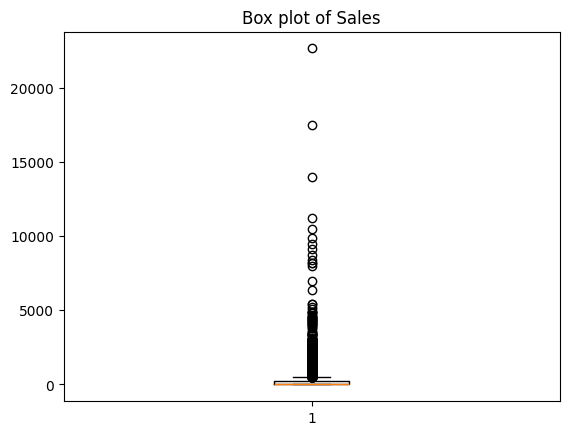

In [68]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
column_name = 'Sales'

# Box plot to visualize outliers
plt.boxplot(df[column_name])
plt.title('Box plot of Sales')
plt.show()

#### **b. OUTLIERS DISCOUNT**

In [69]:
# Mencari outliers pada kolom Discount
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi batas atas dan batas bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_disc = df[(df['Discount'] < lower_bound) | (df['Discount'] > upper_bound)]
outliers_disc.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
14,15,APJ-2021-118983,11/22/2021,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,OneView,D8FGC56NNX,68.810,5,0.8,-123.8580
15,16,APJ-2021-118983,11/22/2021,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,ContactMatcher,NRKT5R1A1G,2.544,3,0.8,-3.8160
28,29,EMEA-2021-150630,9/17/2021,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,ContactMatcher,BGL4P1U2CZ,9.618,2,0.7,-7.0532
32,33,EMEA-2021-150630,9/17/2021,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,ContactMatcher,GPQ0TDTGIM,6.858,6,0.7,-5.7150
36,37,APJ-2022-117590,12/9/2022,20221209,Chloe Short,Japan,Aichi,APJ,JAPN,Procter & Gamble,1077,Consumer Products,Strategic,SaaS Connector Pack,TKN9K1JO1D,190.920,5,0.6,-147.9630


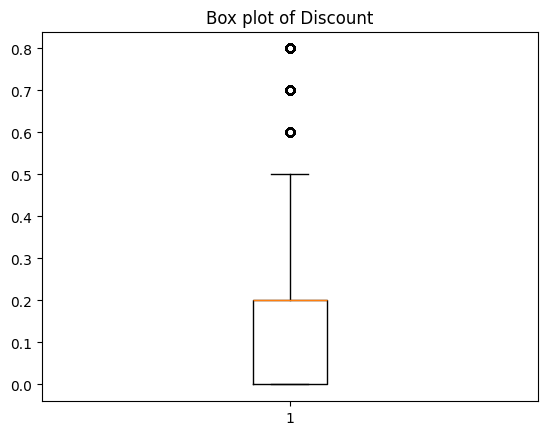

In [70]:
# Box plot to visualize outliers
plt.boxplot(df['Discount'])
plt.title('Box plot of Discount')
plt.show()

#### **c. OUTLIERS PROFIT**

In [71]:
# Mencari outliers pada kolom Profit
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi batas atas dan batas bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_profit = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]
outliers_profit.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
10,11,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
13,14,AMER-2022-161389,12/6/2022,20221206,Adrian Abraham,Canada,Toronto,AMER,NAMER,Microsoft,1066,Tech,SMB,ContactMatcher,COK66F8IC1,407.9760,3,0.20,132.5922


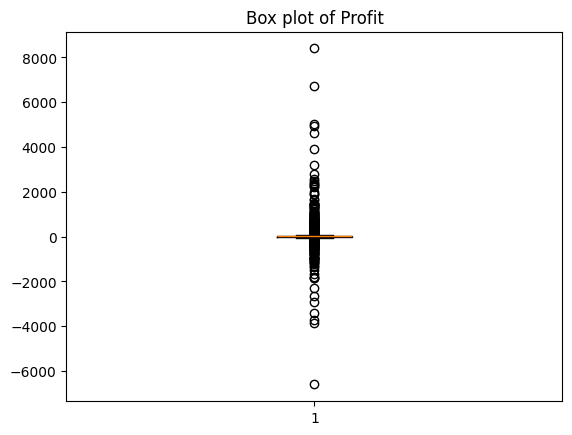

In [72]:
# Box plot to visualize outliers
plt.boxplot(df['Profit'])
plt.title('Box plot of Profit')
plt.show()

**Insight :**

Terdapat data outlier pada kolom Sales, Discount, dan Profit. Namun pada kasus ini data outlier tidak dihapus karena akan digunakan untuk meninjau keuntungan/kerugian penjualan.

### **4. CHANGE DATA TYPE AND ADD COLUMN**

- Mengubah kolom `Order Date` dari object ke datetime dan menambah kolom `Year Month` untuk mempermudah membuat visualisasi data time series

In [73]:
# Mengubah kolom 'Order Date' dari object ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Menambah kolom 'Year Month' dan mengubah ke bentuk object
df['Year Month'] = df['Order Date'].dt.to_period('M').astype('str')

# Menambah kolom 'Year'
df['Year'] = df['Order Date'].dt.year

# Menambah kolom 'Month'
df['Month'] = df['Order Date'].dt.month

# Menambah kolom 'Gross Profit Margin (%)'
df['Gross Profit Margin (%)'] = (df['Profit'] / df['Sales'])*100

Menambah kolom `Gross Profit Margin (%)`. Gross Profit Margin (Margin Laba Kotor) adalah rasio keuangan yang mengukur seberapa efisien sebuah perusahaan mengelola produksi dan penjualan produknya. Rasio ini memberikan gambaran tentang seberapa besar laba kotor (gross profit) yang dihasilkan perusahaan dari penjualan produk atau jasa, dalam hubungannya dengan pendapatan total.

- Gross Profit Margin = (Profit/Sales) x 100

- Penjelasan: Semakin tinggi Gross Profit Margin, semakin besar persentase pendapatan yang tersisa, hal ini dapat dianggap sebagai indikator positif bagi perusahaan.

Meskipun Gross Profit Margin memberikan gambaran umum tentang efisiensi operasional, keterbatasan dari rasio ini yaitu hanya memberikan informasi pada tingkat laba kotor dan tidak mempertimbangkan biaya operasional lainnya seperti biaya penjualan, administrasi, dan bunga, sehingga masih perlu dilakukan perhitungan dengan rasio lainnya. Hal ini menjadi salah satu keterbatasan dari dataset sehingga tidak bisa menghitung secara rinci profitabilitas yang diperoleh perusahan.

In [74]:
df['Date Key'] = df['Date Key'].astype(str)
df['Customer ID'] = df['Customer ID'].astype(str)

Mengubah kolom `Date Key` dan `Customer ID` dari integer ke string untuk menghindari kesalahan karena adanya Leading Zeros, yaitu bilangan 0 di awal. Pada data integer biasanya angka 0 di depan akan terpotong, sehingga angka 0 di awal tidak muncul. Cara untuk menangani masalah tersebut adalah dengan mengubah tipe data dari integer ke string.

In [75]:
## Ekspor dataframe yang sudah bersih
# df.to_csv('SaaS Cleaned.csv')

# **V. DATA ANALYSIS**

## **NORMALITY TEST**

Uji Normalitas adalah sebuah uji yang dilakukan dengan tujuan untuk menilai sebaran data pada sebuah kelompok data atau variabel, apakah sebaran data tersebut berdistribusi normal ataukah tidak.

In [76]:
from scipy.stats import kstest

# Subset DataFrame untuk kolom yang dipilih
cols = ['Sales', 'Quantity', 'Discount', 'Profit']
subset_df = df[cols]

# Perform Kolmogorov-Smirnov test pada tiap kolom
for column in cols:
    stat, p_value = kstest(subset_df[column], 'norm')
    is_normal = p_value > 0.05
    
    print(f"Hasil uji normalitas Kolmogorov-Smirnov untuk {column}:")
    print(f"Statistical value: {stat}")
    print(f"P-value: {p_value}")
    print(f"Data normal: {is_normal}")
    print("\n")

Hasil uji normalitas Kolmogorov-Smirnov untuk Sales:
Statistical value: 0.9820648440401365
P-value: 0.0
Data normal: False


Hasil uji normalitas Kolmogorov-Smirnov untuk Quantity:
Statistical value: 0.8872958956683907
P-value: 0.0
Data normal: False


Hasil uji normalitas Kolmogorov-Smirnov untuk Discount:
Statistical value: 0.5
P-value: 0.0
Data normal: False


Hasil uji normalitas Kolmogorov-Smirnov untuk Profit:
Statistical value: 0.7179722426806663
P-value: 0.0
Data normal: False




Data Sales, Quantity, Discount, dan Profit merupakan data berdistribusi tidak normal.

## **CORRELATION TEST**

Korelasi adalah cara yang digunakan untuk menentukan keeratan hubungan antara dua atau lebih variabel berbeda yang digambarkan dengan ukuran koefisien korelasi. Koefisien korelasi merupakan koefisien yang menggambarkan kedekatan hubungan antara dua atau lebih variabel.


| **Koefisien** | **Kekuatan Hubungan** |
|---|---|
| 0.00 | Tidak ada hubungan |
| 0.01 - 0.09 | hubungan kurang berarti/sangat lemah |
| 0.10 - 0.29 | hubungan lemah |
| 0.30 - 0.49 | hubungan moderat/sedang |
| 0.50 - 0.69 | hubungan kuat |
| 0.70 - 0.89 | hubungan sangat kuat |
| 0.90 - 0.99 | hubungan mendekati sempurna |

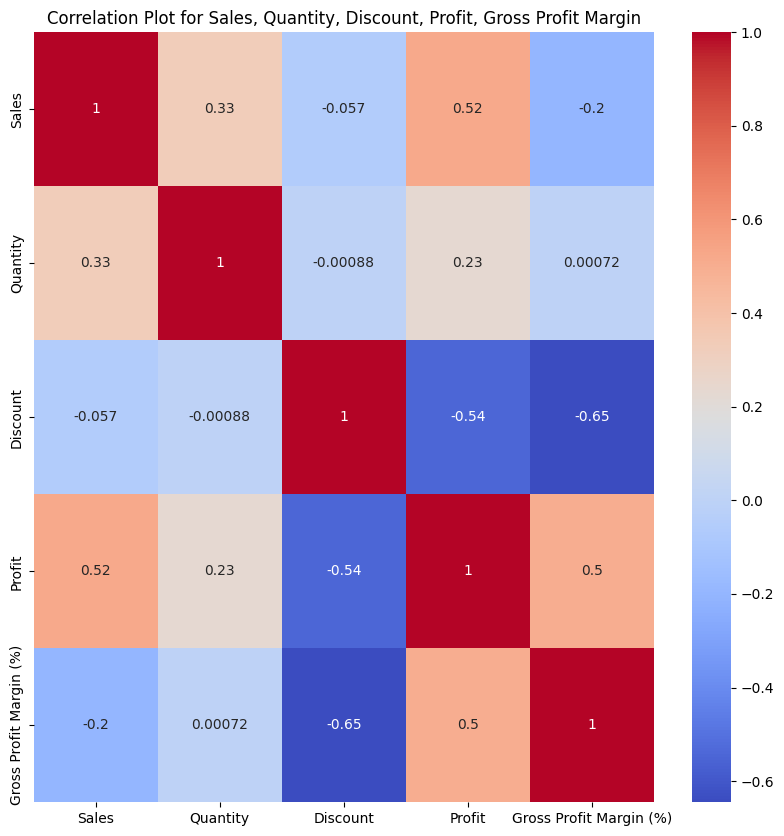

In [77]:
# Subset DataFrame untuk kolom yang dipilih
cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Gross Profit Margin (%)']
subset_df = df[cols]

# Uji korelasi
corr = subset_df.corr(method = 'spearman')

# Visualisasi menggunakan heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Plot for Sales, Quantity, Discount, Profit, Gross Profit Margin')
plt.show()


**Hasil Uji Korelasi :**

- Hubungan antara Sales dengan Quantity sebesar 0.33, menandakan hubungan positif yang moderat/sedang.
- Hubungan antara Sales dengan Profit sebesar 0.52, menandakan hubungan positif yang kuat. Dimana pada saat sales naik, maka profit juga akan ikut naik.
- Hubungan antara Discount dengan Profit sebesar -0.54, menandakan hubungan negatif yang kuat. Dimana pada saat diskon naik, maka profit akan turun.
- Hubungan antara Discount dengan Gross Profit Margin sebesar -0.65, menandakan hubungan negatif yang kuat. Dimana pada saat diskon naik, maka gross profit margin akan turun.
- Hubungan antara Profit dengan Gross Profit Margin sebesar 0.5, menandakan hubungan positif yang kuat. Dimana pada saat profit naik, maka gross pofit margin akan naik.

## **1. TOTAL SALES**

Meninjau total sales dari tahun 2020 sampai tahun 2023 untuk melihat pergerakan penjualan dari tahun ke tahun.

In [78]:
df_ann = df.groupby(['Year'])[['Quantity', 'Sales', 'Profit']].sum().sort_values(by = 'Year').reset_index()
df_ann['Gross Profit Margin (%)'] = np.round((df_ann['Profit'] / df_ann['Sales'])*100,3)
df_ann

,Year,Quantity,Sales,Profit,Gross Profit Margin (%)
0,2020,7581,484247.4981,49543.9741,10.231
1,2021,7979,470532.5090,61618.6037,13.096
2,2022,9810,608473.8300,81726.9308,13.431
3,2023,12503,733947.0232,93507.5131,12.740


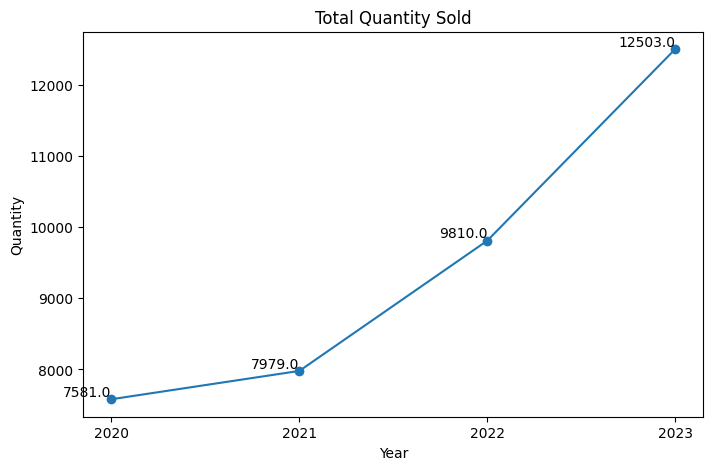

In [79]:
# Membuat figure dengan ukuran spesifik
plt.figure(figsize= (8,5))
plt.plot(df_ann['Year'],
         df_ann['Quantity'], marker = 'o')

# Adding numerical values to each data point
for i, txt in enumerate(df_ann['Quantity']):
    plt.text(df_ann['Year'][i],  # X-coordinate for text
             df_ann['Quantity'][i],  # Y-coordinate for text
             f'{txt:.1f}',  # Text format with one decimal place
             ha='right',  # Horizontal alignment
             va='bottom')  # Vertical alignment

plt.title('Total Quantity Sold')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(df_ann['Year'])
plt.show()

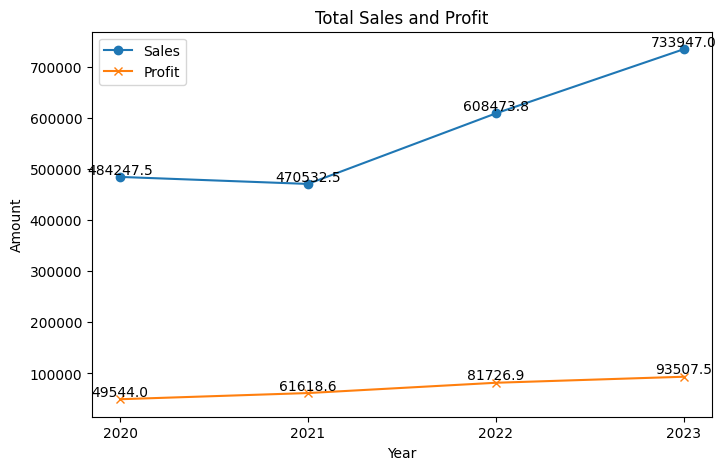

In [80]:
# Membuat figure dengan ukuran spesifik
plt.figure(figsize= (8,5))
plt.plot(df_ann['Year'],
         df_ann['Sales'], label = 'Sales', marker = 'o')
plt.plot(df_ann['Year'],
         df_ann['Profit'], label= 'Profit', marker = 'x')

# Adding numerical values to each data point
for i, txt in enumerate(df_ann['Sales']):
    plt.text(df_ann['Year'][i],  # X-coordinate for text
             df_ann['Sales'][i],  # Y-coordinate for text
             f'{txt:.1f}',  # Text format with one decimal place
             ha='center',  # Horizontal alignment
             va='bottom')  # Vertical alignment

for i, txt in enumerate(df_ann['Profit']):
    plt.text(df_ann['Year'][i],  # X-coordinate for text
             df_ann['Profit'][i],  # Y-coordinate for text
             f'{txt:.1f}',  # Text format with one decimal place
             ha='center',  # Horizontal alignment
             va='bottom')  # Vertical alignment

plt.title('Total Sales and Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(df_ann['Year'])
plt.legend(loc='best')
plt.show()

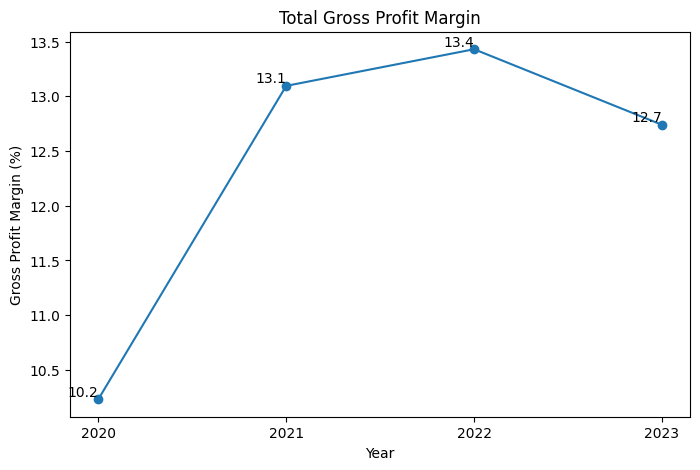

In [81]:
plt.figure(figsize= (8,5))
plt.plot(df_ann['Year'],
         df_ann['Gross Profit Margin (%)'], marker = 'o')

# Adding numerical values to each data point
for i, txt in enumerate(df_ann['Gross Profit Margin (%)']):
    plt.text(df_ann['Year'][i],  # X-coordinate for text
             df_ann['Gross Profit Margin (%)'][i],  # Y-coordinate for text
             f'{txt:.1f}',  # Text format with one decimal place
             ha='right',  # Horizontal alignment
             va='bottom')  # Vertical alignment

# Adding title and labels to the plot
plt.title('Total Gross Profit Margin')
plt.xlabel('Year')
plt.ylabel('Gross Profit Margin (%)')
plt.xticks(df_ann['Year'])
plt.show()

**Insight :**

- Meskipun pada tahun 2021 jumlah `Sales` turun dari 484247 USD menjadi 470532 USD dan jumlah produk terjual tidak naik signifikan dibanding tahun 2020, dengan total kenaikan `Quantity` sebanyak 398 dari 7581 menjadi 7979, namun pada tahun tersebut `Profit` yang didapat tetap mengalami peningkatan dari 49544 USD menjadi 61618 USD.

- Berbeda halnya dengan `Gross Profit Margin` yang terjadi penurunan di tahun 2023 menjadi 12.7% dari sebelumnya 13.4%. Hal ini menandakan bahwa Perusahaan kurang efektif dan efisien dalam mengelola penjualan produknya.

## **2. TOTAL SALES BY TIME**

Menganalisa pola panjualan dari waktu ke waktu untuk mengetahui tren pasar.

In [82]:
df_ann2 = df.groupby(['Year Month'])[['Quantity', 'Sales', 'Profit']].sum().sort_values(by = 'Year Month').reset_index()
df_ann2['Gross Profit Margin (%)'] = (df_ann2['Profit']/df_ann2['Sales']*100)
df_ann2.head()

,Year Month,Quantity,Sales,Profit,Gross Profit Margin (%)
0,2020-01,282,13946.229,2446.7711,17.544320
1,2020-02,161,4810.558,865.7280,17.996415
2,2020-03,585,55691.009,498.7299,0.895530
3,2020-04,536,28295.345,3488.8352,12.330068
4,2020-05,466,23648.287,2738.7096,11.581006


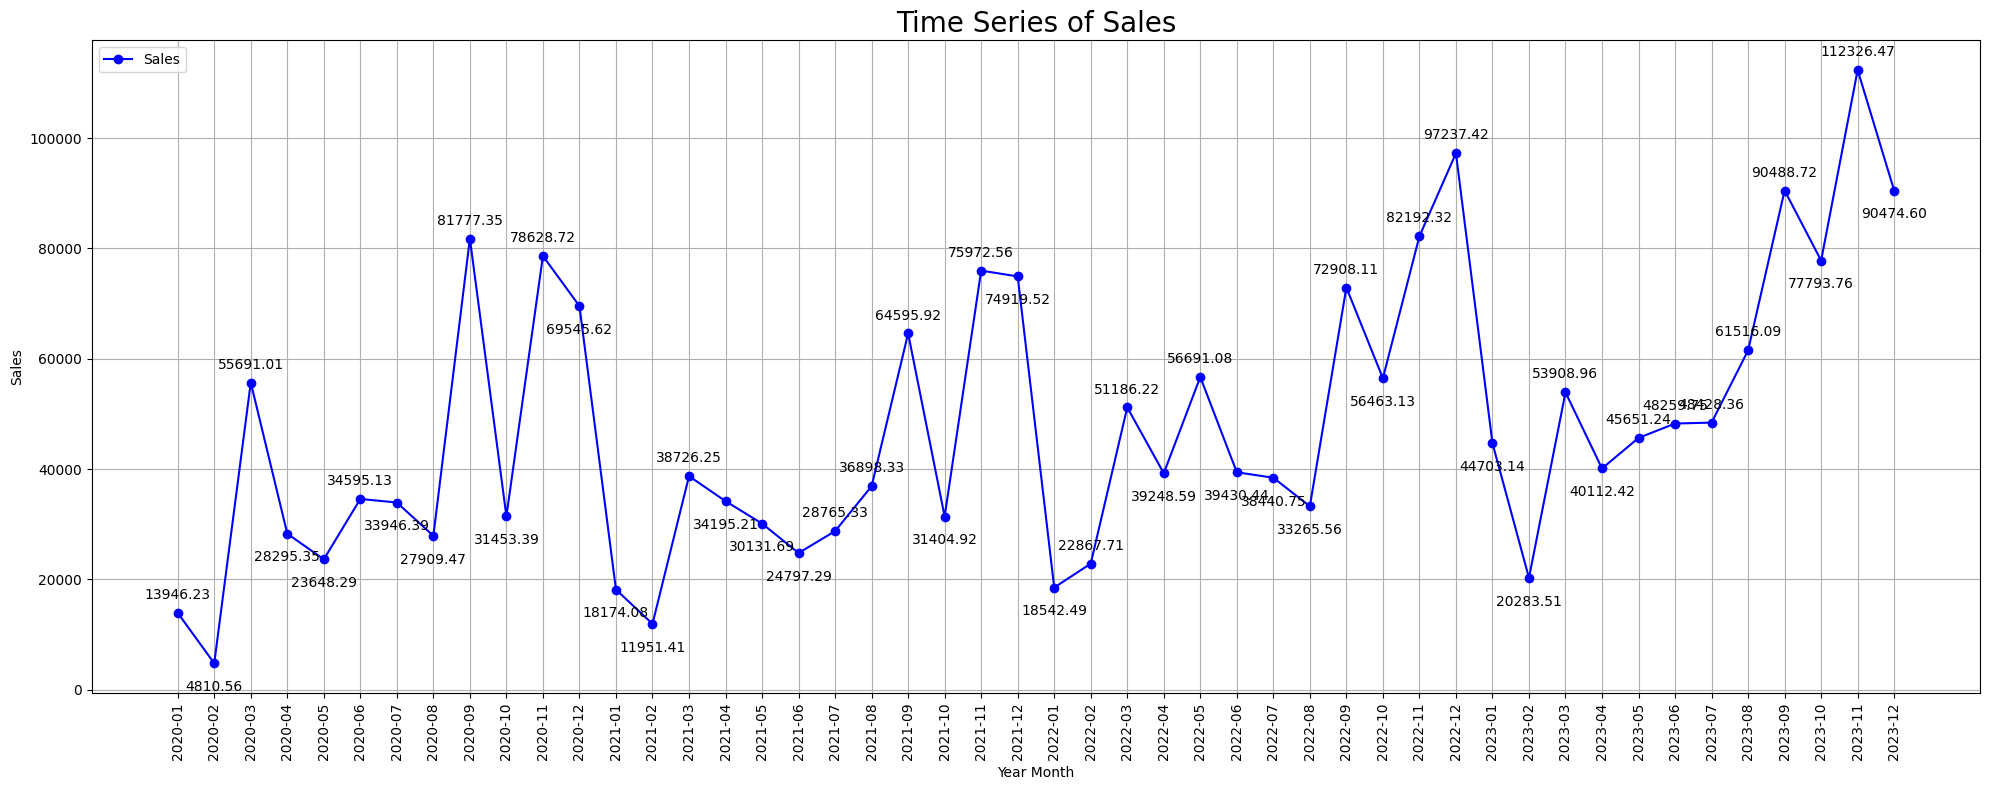

In [83]:
import matplotlib.pyplot as plt

# Dataframe Anda df_ann2

# Membuat grafik
plt.figure(figsize=(20, 8))

# Plot Sales
plt.plot(df_ann2['Year Month'], df_ann2['Sales'], color = 'blue', marker='o', label='Sales')

# Label marker
for i, txt in enumerate(df_ann2['Sales']):
    if i > 0:
        if df_ann2['Sales'][i] > df_ann2['Sales'][i-1]:
            plt.annotate(f'{txt:.2f}', (df_ann2['Year Month'][i], df_ann2['Sales'][i]), xytext=(0,10), textcoords='offset points', ha='center')
        else:
            plt.annotate(f'{txt:.2f}', (df_ann2['Year Month'][i], df_ann2['Sales'][i]), xytext=(0,-20), textcoords='offset points', ha='center')
    else:
        plt.annotate(f'{txt:.2f}', (df_ann2['Year Month'][i], df_ann2['Sales'][i]), xytext=(0,10), textcoords='offset points', ha='center')

# Label sumbu dan judul
plt.xlabel('Year Month')
plt.ylabel('Sales')
plt.title('Time Series of Sales', size = 20)
plt.xticks(rotation=90)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()


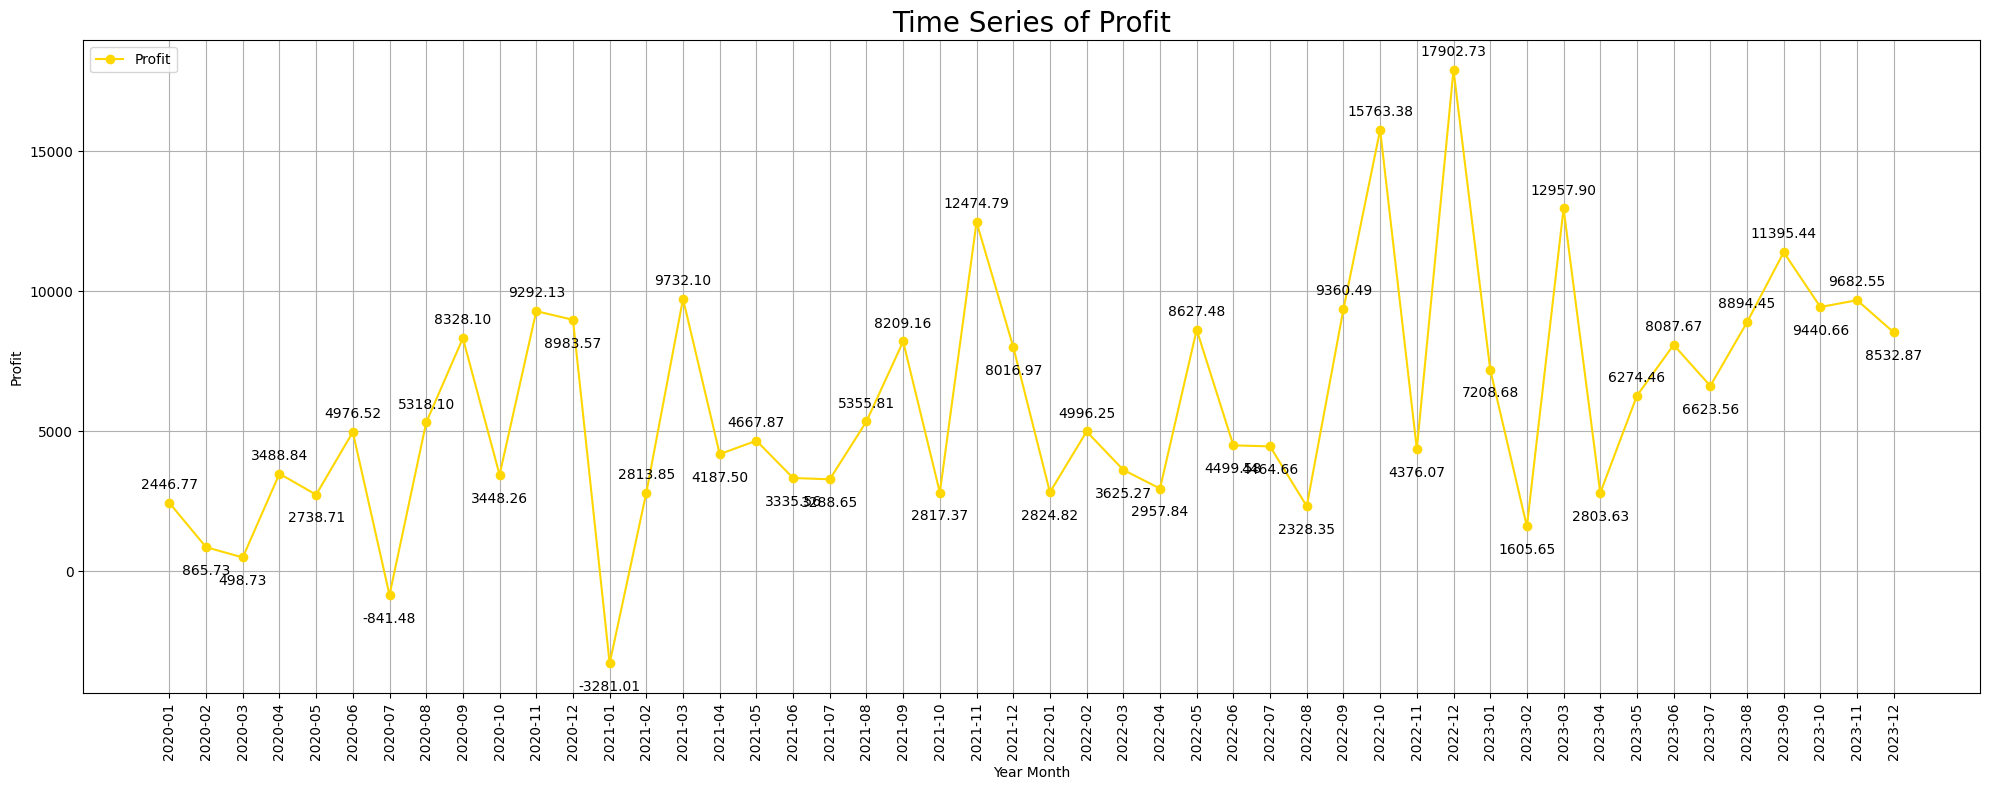

In [84]:
# Membuat grafik
plt.figure(figsize=(20, 8))

# Plot Profit
plt.plot(df_ann2['Year Month'], df_ann2['Profit'], color = 'gold', marker='o', label='Profit')

# Label marker
for i, txt in enumerate(df_ann2['Profit']):
    if i > 0:
        if df_ann2['Profit'][i] > df_ann2['Profit'][i-1]:
            plt.annotate(f'{txt:.2f}', (df_ann2['Year Month'][i], df_ann2['Profit'][i]), xytext=(0,10), textcoords='offset points', ha='center')
        else:
            plt.annotate(f'{txt:.2f}', (df_ann2['Year Month'][i], df_ann2['Profit'][i]), xytext=(0,-20), textcoords='offset points', ha='center')
    else:
        plt.annotate(f'{txt:.2f}', (df_ann2['Year Month'][i], df_ann2['Profit'][i]), xytext=(0,10), textcoords='offset points', ha='center')

# Label sumbu dan judul
plt.xlabel('Year Month')
plt.ylabel('Profit')
plt.title('Time Series of Profit', size = 20)
plt.xticks(rotation=90)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()

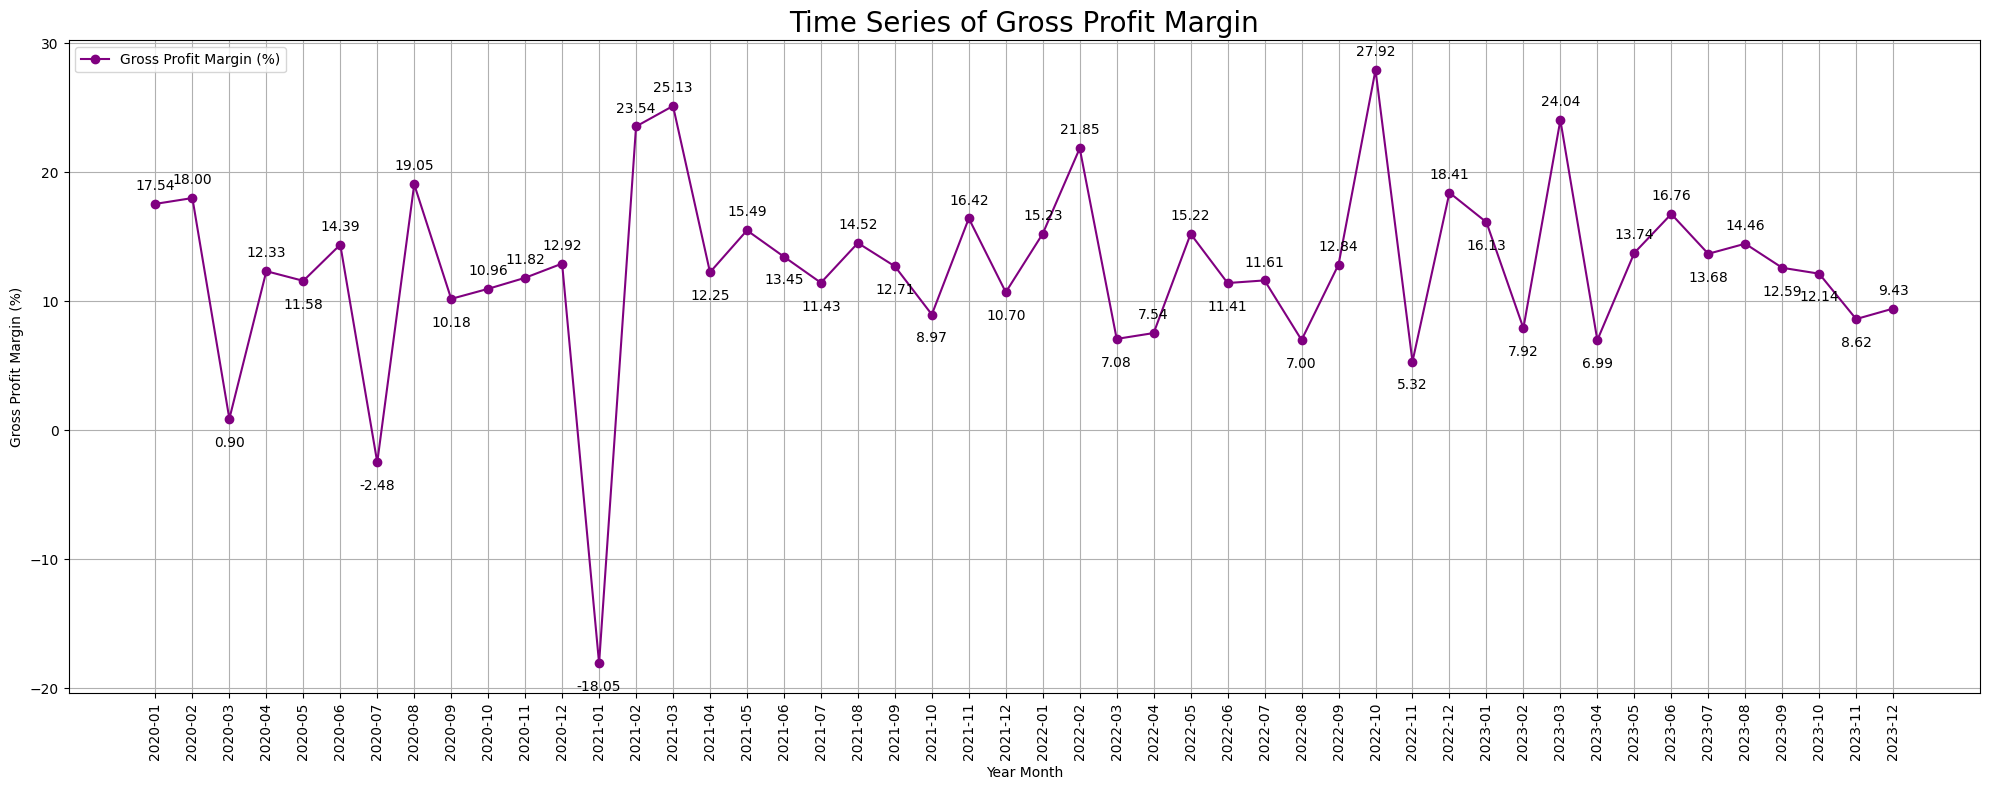

In [85]:
# Membuat grafik
plt.figure(figsize=(20, 8))

# Plot Gross Profit Margin (%)
plt.plot(df_ann2['Year Month'], df_ann2['Gross Profit Margin (%)'], color = 'purple', marker='o', label='Gross Profit Margin (%)')

# Label marker
for i, txt in enumerate(df_ann2['Gross Profit Margin (%)']):
    if i > 0:
        if df_ann2['Gross Profit Margin (%)'][i] > df_ann2['Gross Profit Margin (%)'][i-1]:
            plt.annotate(f'{txt:.2f}', (df_ann2['Year Month'][i], df_ann2['Gross Profit Margin (%)'][i]), xytext=(0,10), textcoords='offset points', ha='center')
        else:
            plt.annotate(f'{txt:.2f}', (df_ann2['Year Month'][i], df_ann2['Gross Profit Margin (%)'][i]), xytext=(0,-20), textcoords='offset points', ha='center')
    else:
        plt.annotate(f'{txt:.2f}', (df_ann2['Year Month'][i], df_ann2['Gross Profit Margin (%)'][i]), xytext=(0,10), textcoords='offset points', ha='center')

# Label sumbu dan judul
plt.xlabel('Year Month')
plt.ylabel('Gross Profit Margin (%)')
plt.title('Time Series of Gross Profit Margin', size = 20)
plt.xticks(rotation=90)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()

**Insight :**

- Peningkatan Sales terjadi pada bulan Maret, September, dan November.
- Sales menurun pada bulan Januari dan April.
- Sales tertinggi pada bulan November 2023 dengan total penjualan sebesar 112326.47 USD dan terendah pada bulan Februari 2020 sebesar 4810.56
- Profit tertinggi pada bulan Desember 2023 sebesar 17902.73 dan terendah pada bulan Januari 2021 dengan kerugian 3281.01 USD
- Gross Profit Margin tertinggi pada Oktober 2022 (27.92%)
- Gross Profit Margin negatif pada Juli 2020 (-2.48%) dan Januari 2021 (-18.05%). Gross Profit Margin negatif menunjukkan biaya langsung produksi atau akuisisi barang atau jasa yang dijual lebih besar dari pendapatan penjualan. Dengan kata lain, perusahaan kehilangan uang setiap kali mereka menjual produk atau layanan.

### **a. TOTAL PROFIT BY PRODUCT**

In [86]:
df_prod = df.groupby(['Product'])[['Quantity', 'Sales', 'Profit']].sum().sort_values(by = 'Profit', ascending=False).reset_index()
df_prod['Gross Profit Margin (%)'] = np.round((df_prod['Profit']/df_prod['Sales'])*100,3)
df_prod


,Product,Quantity,Sales,Profit,Gross Profit Margin (%)
0,Alchemy,234,149528.0300,55617.8249,37.196
1,Site Analytics,3289,330007.0540,44515.7306,13.489
2,Data Smasher,2976,167380.3180,41936.6357,25.055
3,Support,5825,125152.7440,32864.4698,26.259
4,FinanceHub,3756,340935.4150,32136.4203,9.426
5,Marketing Suite - Gold,3158,223843.6080,21278.8264,9.506
6,OneView,1729,107532.1610,18138.0054,16.868
7,SaaS Connector Pack,3563,91705.1640,13059.1436,14.240
8,ContactMatcher,7215,410378.2650,12496.2822,3.045
9,SaaS Connector Pack - Gold,906,16476.4020,6964.1767,42.268


**Insight :**

- 3 Penjualan produk dengan profit tertinggi pada penjualan Alchemy, Site Analytics, dan Data Smasher

- Tingginya `Sales` dan rendahnya `Profit` dapat menyebabkan turunnya `Gross Profit Margin`, karena Gross Profit Margin digunakan untuk mengukur efisiensi dan profitabilitas bisnis dalam menghasilkan keuntungan dari penjualan produk.

- `Gross Profit Margin` dibawah 10% untuk produk Marketing Suite - Gold, FinanceHub, ContactMatcher, Big Ol Database, Marketing Suite.

- Perbedaan antara tingginya `Sales` dan rendahnya `Gross Profit Margin` bisa menjadi indikator bahwa meskipun perusahaan berhasil dalam mencapai volume penjualan yang tinggi, efisiensi dalam mengelola biaya produksi dan keuntungan kotor mungkin perlu ditingkatkan. 

- Perlu perbaikan kebijakan pada produk yang profitnya kurang dari 10% seperti penetapan diskon produk, karena besarnya diskon yang ditetapkan akan mempengaruhi besarnya profit. Hal ini dapat dilihat dari besarnya Quantity yang terjual namun profit yang didapat tidak sejalan dengan total penjualan.

### **b. TOTAL ANNUAL PROFIT BY PRODUCT**

In [87]:
# Menampilkan penjualan produk 
df_ann_t2 = df.groupby(['Year', 'Product'])[['Quantity', 'Sales', 'Profit']].sum().sort_values(by = 'Profit', ascending=False).reset_index()

In [88]:
# Profit tahun 2020
df_ann_2020 = df_ann_t2[df_ann_t2['Year'] == 2020]
df_ann_2020['Gross Profit Margin (%)'] = np.round((df_ann_2020['Profit']/df_ann_2020['Sales'])*100,3)
df_ann_2020

C:\Users\gagah\AppData\Local\Temp\ipykernel_24056\3017952329.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Product,Quantity,Sales,Profit,Gross Profit Margin (%)
4,2020,Site Analytics,684,77390.8060,11808.0053,15.258
13,2020,FinanceHub,866,80082.9700,8241.0512,10.291
19,2020,Support,1147,29229.0260,6861.0770,23.474
21,2020,Data Smasher,580,25014.2720,6402.7150,25.596
24,2020,Marketing Suite - Gold,673,50329.0420,4166.2788,8.278
31,2020,Alchemy,29,10849.7820,2912.9433,26.848
34,2020,OneView,314,15313.6250,2459.4999,16.061
37,2020,SaaS Connector Pack,660,13826.2340,1972.8919,14.269
39,2020,ContactMatcher,1359,89576.6305,1615.6733,1.804
40,2020,SaaS Connector Pack - Gold,206,3855.7500,1495.4788,38.786


Text(0.5, 1.0, 'Profit by Product in 2020')

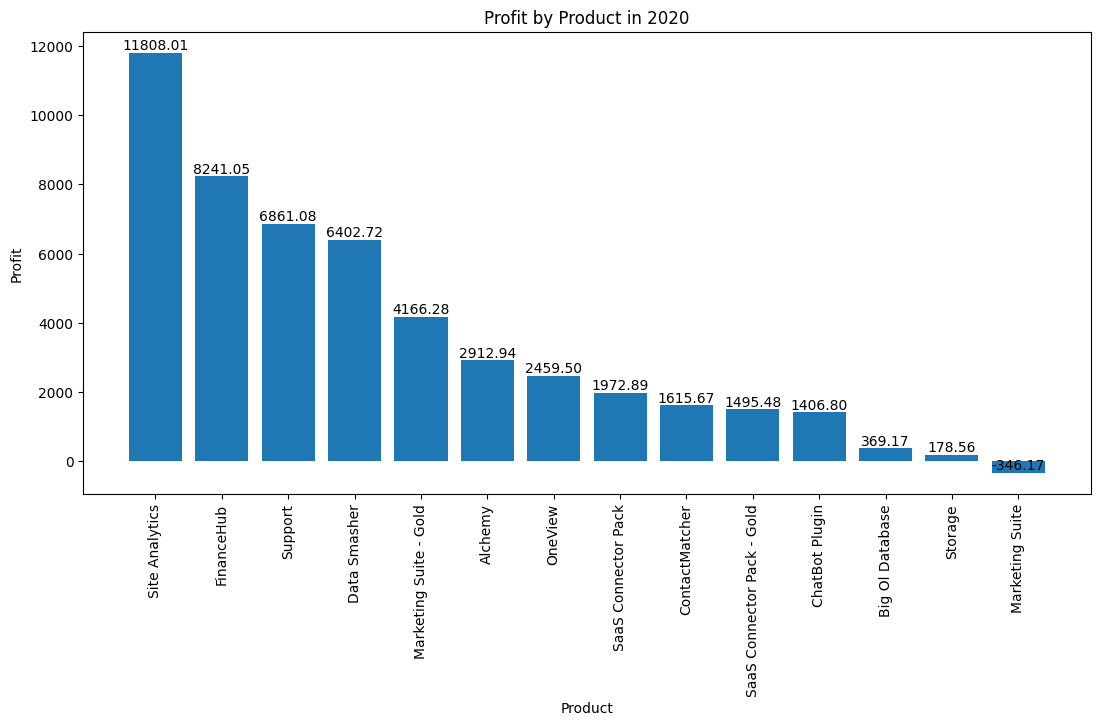

In [89]:
# Membuat chart penjualan produk tahun 2020
plt.figure(figsize= (13,6))
plt.bar(df_ann_2020['Product'], df_ann_2020['Profit'])

for x, y in zip(df_ann_2020['Product'], df_ann_2020['Profit']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title(f'Profit by Product in 2020')

In [90]:
# Profit tahun 2021
df_ann_2021 = df_ann_t2[df_ann_t2['Year'] == 2021]
df_ann_2021['Gross Profit Margin (%)'] = np.round((df_ann_2021['Profit']/df_ann_2021['Sales'])*100,3)
df_ann_2021

C:\Users\gagah\AppData\Local\Temp\ipykernel_24056\343978015.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Product,Quantity,Sales,Profit,Gross Profit Margin (%)
6,2021,Site Analytics,697,68313.7020,10398.8074,15.222
7,2021,Data Smasher,635,40523.9600,10197.2752,25.164
8,2021,Alchemy,63,26179.4500,9930.2988,37.932
15,2021,FinanceHub,791,74690.9910,7551.4447,10.110
20,2021,Support,1196,17240.1200,6545.2916,37.965
26,2021,ContactMatcher,1450,76603.5215,4086.8695,5.335
28,2021,Marketing Suite - Gold,655,45048.2480,3505.4601,7.782
29,2021,SaaS Connector Pack,770,21089.7120,3051.8189,14.471
30,2021,Big Ol Database,94,27763.6970,2977.4856,10.724
33,2021,OneView,365,23241.2890,2511.8957,10.808


Text(0.5, 1.0, 'Profit by Product in 2021')

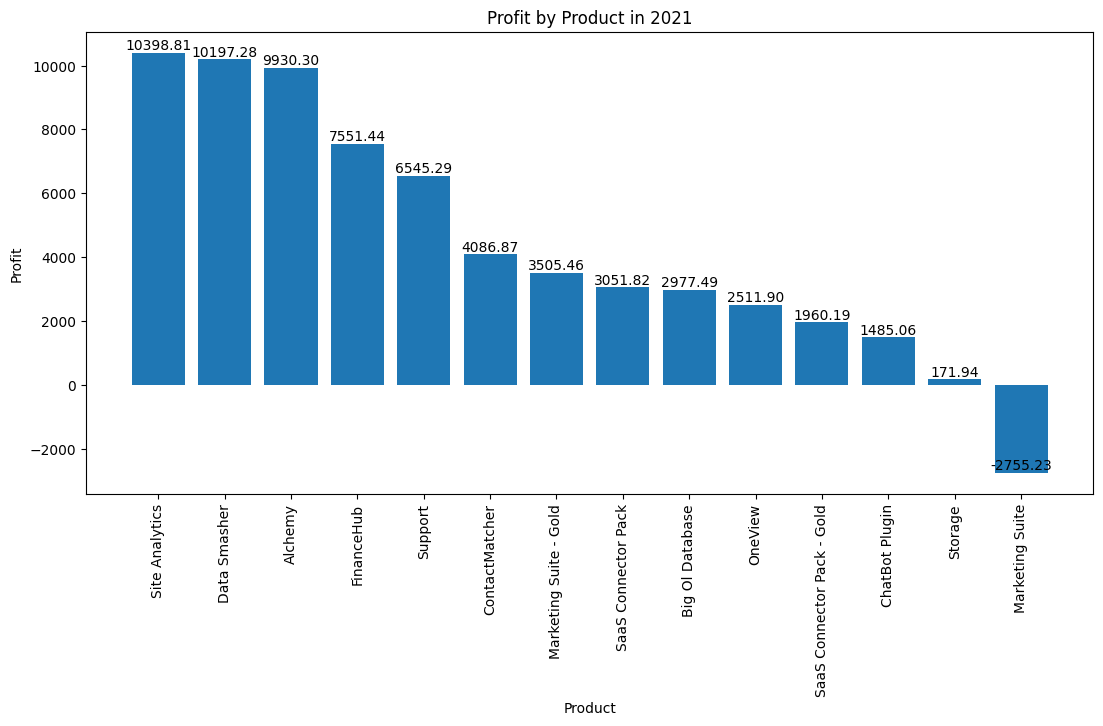

In [91]:
# Membuat chart penjualan produk tahun 2021
plt.figure(figsize= (13,6))
plt.bar(df_ann_2021['Product'], df_ann_2021['Profit'])

for x, y in zip(df_ann_2021['Product'], df_ann_2021['Profit']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title(f'Profit by Product in 2021')

In [92]:
# Profit tahun 2022
df_ann_2022 = df_ann_t2[df_ann_t2['Year'] == 2022]
df_ann_2022['Gross Profit Margin (%)'] = np.round((df_ann_2022['Profit']/df_ann_2022['Sales'])*100,3)
df_ann_2022.sort_values('Product')

C:\Users\gagah\AppData\Local\Temp\ipykernel_24056\4218499658.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Product,Quantity,Sales,Profit,Gross Profit Margin (%)
1,2022,Alchemy,69,49599.4100,17742.7926,35.772
32,2022,Big Ol Database,129,55906.8860,2907.3180,5.200
43,2022,ChatBot Plugin,673,5909.6520,1408.7534,23.838
17,2022,ContactMatcher,1939,110318.3815,7197.3390,6.524
9,2022,Data Smasher,682,41895.8540,9664.2885,23.067
18,2022,FinanceHub,977,86745.8850,6955.7658,8.019
48,2022,Marketing Suite,197,26275.4665,212.4710,0.809
22,2022,Marketing Suite - Gold,804,58632.1880,6239.5020,10.642
23,2022,OneView,396,26050.3150,5301.3415,20.350
27,2022,SaaS Connector Pack,1036,27874.1240,3935.2700,14.118


Text(0.5, 1.0, 'Profit by Product in 2022')

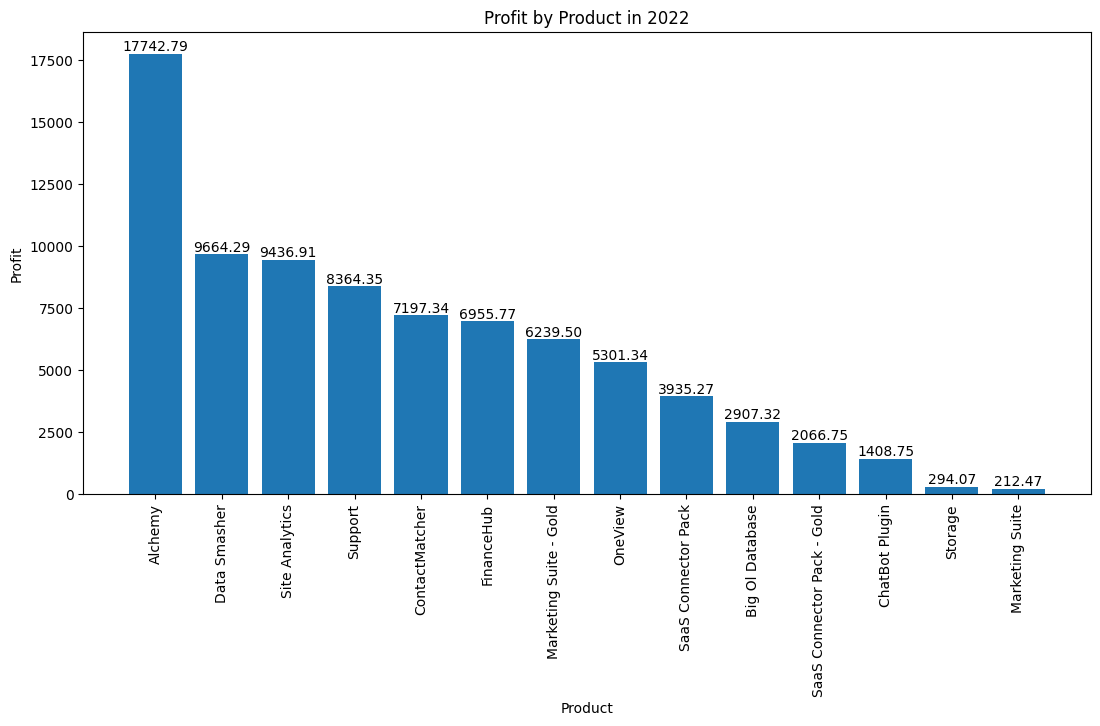

In [93]:
# Membuat chart penjualan produk tahun 2022
plt.figure(figsize= (13,6))
plt.bar(df_ann_2022['Product'], df_ann_2022['Profit'])

for x, y in zip(df_ann_2022['Product'], df_ann_2022['Profit']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title(f'Profit by Product in 2022')

In [94]:
# Profit tahun 2023
df_ann_2023 = df_ann_t2[df_ann_t2['Year'] == 2023]
df_ann_2023['Gross Profit Margin (%)'] = np.round((df_ann_2023['Profit']/df_ann_2023['Sales'])*100,3)
df_ann_2023.sort_values('Product')

C:\Users\gagah\AppData\Local\Temp\ipykernel_24056\3680562378.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Product,Quantity,Sales,Profit,Gross Profit Margin (%)
0,2023,Alchemy,73,62899.3880,25031.7902,39.797
55,2023,Big Ol Database,121,43544.6750,-2869.2156,-6.589
35,2023,ChatBot Plugin,1106,8914.3240,2227.1723,24.984
52,2023,ContactMatcher,2467,133879.7315,-403.5996,-0.301
2,2023,Data Smasher,1079,59946.2320,15672.3570,26.144
11,2023,FinanceHub,1122,99415.5690,9388.1586,9.443
53,2023,Marketing Suite,276,30024.2797,-583.6261,-1.944
16,2023,Marketing Suite - Gold,1026,69834.1300,7367.5855,10.550
14,2023,OneView,654,42926.9320,7865.2683,18.322
25,2023,SaaS Connector Pack,1097,28915.0940,4099.1628,14.177


Text(0.5, 1.0, 'Profit by Product in 2023')

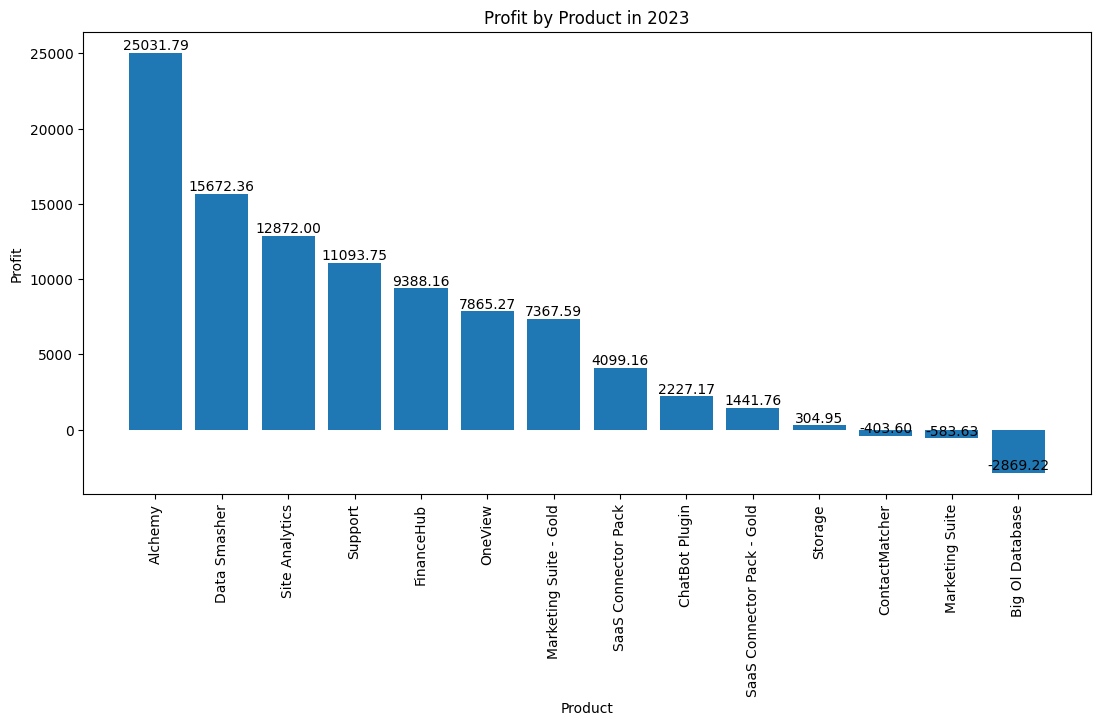

In [95]:
# Membuat chart penjualan produk tahun 2023
plt.figure(figsize= (13,6))
plt.bar(df_ann_2023['Product'], df_ann_2023['Profit'])

for x, y in zip(df_ann_2023['Product'], df_ann_2023['Profit']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title(f'Profit by Product in 2023')

**Insight :**
> 2020 :
- Penjualan tertinggi Site Analytics dengan total Profit sebesar 11808 USD
- Penjualan terbanyak ContactMatcher sebanyak 1359
- Marketing Suite mengalami kerugian 346 USD
> 2021 :
- Penjualan tertinggi Site Analytics dengan total Profit sebesar 10398 USD
- Penjualan terbanyak ContactMatcher sebanyak 1450
- Marketing Suite mengalami kerugian 2755 USD
> 2022 :
- Penjualan tertinggi Alchemy dengan total Profit sebesar 17742 USD
- Penjualan terbanyak ContactMatcher sebanyak 1939
- Profit terendah oleh Marketing Suite dengan Profit sebesar 212 USD
> 2023 :
- Penjualan tertinggi Alchemy dengan total Profit sebesar 25031 USD
- Penjualan terbanyak ContactMatcher sebanyak 2467
- ContactMatcher, Marketing Suite, Big Ol Database mengalami kerugian masing-masing sebesar 403 USD, 583 USD, 2869 USD

## **3. DISCOUNT ANALYSIS**

Analisis diskon terhadap sales dan profit dilakukan untuk mengetahui seberapa besar pengaruh diskon terhadap sales dan profit sehingga perusahaan dapat mengambil keputusan terhadap besarnya diskon maksimum yang akan ditetapkan di kemudian hari sehingga tidak merugikan perusahaan.

### **a. DISCOUNT**

In [96]:
# Membuat tabel berdasarkan jumlah diskon
df_disc = df.groupby(['Discount'])[['Quantity', 'Sales', 'Profit']].sum().sort_values(by = 'Discount').reset_index()
df_disc['Gross Profit Margin (%)'] = np.round((df_disc['Profit']/df_disc['Sales']*100),3)
df_disc

,Discount,Quantity,Sales,Profit,Gross Profit Margin (%)
0,0.00,18267,1.087908e+06,320987.6032,29.505
1,0.10,373,5.436935e+04,9029.1770,16.607
2,0.15,198,2.755852e+04,1418.9915,5.149
3,0.20,13660,7.645944e+05,90337.3060,11.815
4,0.30,849,1.032267e+05,-10369.2774,-10.045
5,0.32,105,1.449346e+04,-2391.1377,-16.498
6,0.40,786,1.164178e+05,-23057.0504,-19.805
7,0.45,45,5.484974e+03,-2493.1111,-45.453
8,0.50,241,5.891854e+04,-20506.4281,-34.805
9,0.60,501,6.644700e+03,-5944.6552,-89.465


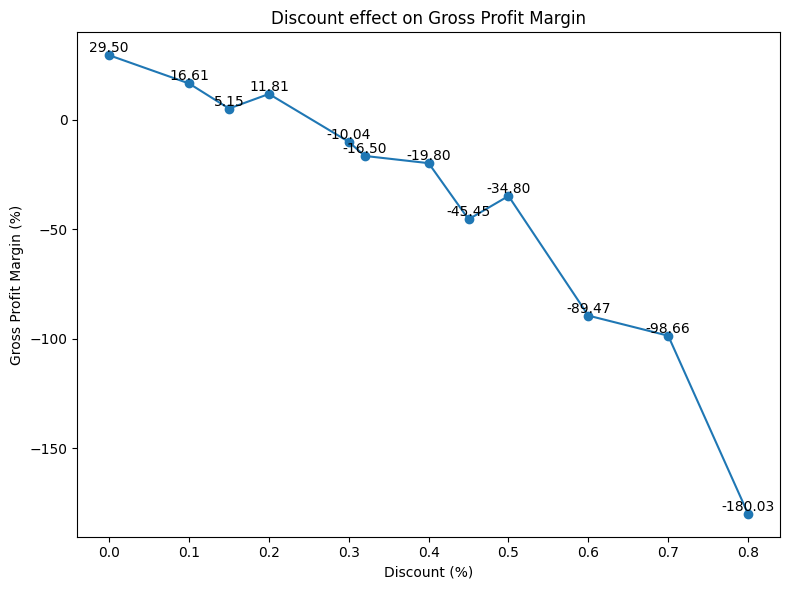

In [97]:
plt.figure(figsize=(8, 6))
plt.plot(df_disc['Discount'], df_disc['Gross Profit Margin (%)'], marker = 'o')

for x, y in zip(df_disc['Discount'], df_disc['Gross Profit Margin (%)']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xlabel('Discount (%)')
plt.ylabel('Gross Profit Margin (%)')
plt.title('Discount effect on Gross Profit Margin')

plt.tight_layout()
plt.show()

**Insight :**

- Berdasarkan keseluruhan transaksi, penetapan diskon yang dilakukan perusahaan berada pada rentang 10% - 80%, namun sebanyak 18267 transaksi tidak menggunakan diskon.

- Terdapat 13660 produk yang diberi diskon 20%, dengan rata-rata Gross Profit Margin sebesar 11.815%.

- Penetapan diskon yang dilakukan paling optimal sebesar 10% - 20%, pemberian diskon lebih dari itu menyebabkan kerugian dan mengancam kelangsungan bisnis perusahaan. Hal ini ditandai dengan `Gross Profit Margin` yang menunjukkan angka negatif dimulai dari diskon yang diberikan kepada customer sebesar 30%.

- Kerugian terbesar terjadi pada pemberian diskon sebesar 80%, dimana Gross Profit Margin menunjukkan angka -180.025%, yang berarti perusahaan harus menutup kerugian yang dikeluarkan lebih besar dari modal investasi awal yang dikeluarkan.

- Kerugian terbesar kedua yang dialami perusahaan jika memberikan diskon sebesar 70%, dengan Gross Profit Margin sebesar -98.658%. Hal ini menunjukkan bahwa kerugian yang ditutup perusahaan hampir mendekati modal awal yang dikeluarkan.

### **b. DISCOUNT BY PRODUCT**

In [98]:
# Membuat tabel diskon pada tiap produk
df_disc_prod = df.groupby(['Discount', 'Product'])[['Quantity', 'Sales', 'Profit']].sum().sort_values(by = 'Discount').reset_index()
df_disc_prod['Gross Profit Margin (%)'] = np.round((df_disc_prod['Profit']/df_disc_prod['Sales']*100),3)
df_disc_prod

,Discount,Product,Quantity,Sales,Profit,Gross Profit Margin (%)
0,0.00,Alchemy,82,76449.1800,35556.1349,46.510
1,0.00,Support,3629,84717.0800,27047.8619,31.927
2,0.00,Storage,504,1822.8400,652.2052,35.780
3,0.00,SaaS Connector Pack - Gold,548,10606.4500,4976.9844,46.924
4,0.00,SaaS Connector Pack,2163,61449.8000,16847.9689,27.417
5,0.00,OneView,1021,78066.1900,23183.7361,29.698
6,0.00,Marketing Suite - Gold,2044,157853.7600,25528.1715,16.172
7,0.00,Site Analytics,1102,123879.7100,34365.2093,27.741
8,0.00,FinanceHub,1485,100300.2900,26355.1921,26.276
9,0.00,Data Smasher,1835,118370.3100,35289.2539,29.813


**Insight :**

- Tidak disarankan untuk memberi diskon untuk pembelian Marketing Suite - Gold, apabila ada diskon sebaiknya kurang dari 20%.

- Maksimum diskon sebesar 20% diberikan kepada Customer yang melakukan pembelian Contact Matcher, Site Analytics, SaaS Connector Pack - Gold, FinanceHub, ChatBot Plugin, Storage, Marketing Suite, SaaS Connector Pack, dan OneView. Diskon yang diberikan diatas 20% akan beresiko menimbulkan kerugian.

- Diskon sebesar 20% masih aman untuk diberikan kepada customer yang membeli Support dan Data Smasher, namun harus berhati-hati apabila memberi diskon lebih dari 20%.

- Maksimum diskon sebesar 20% diberikan kepada Customer yang melakukan pembelian Big Ol Database. Diskon yang diberikan diatas 30% akan beresiko menimbulkan kerugian.

- Diskon sebesar 40% masih aman untuk diberikan kepada customer yang membeli Alchemy, tapi sebaiknya dibawah itu untuk menjaga profit.

## **4. MARKET SEGMENTATION**

Mengamati pasar berdasarkan `Profit` berarti mengambil pendekatan yang lebih fokus pada aspek keuangan dan profitabilitas dari produk atau layanan. Mengidentifikasi produk yang memberikan kontribusi terbesar terhadap pendapatan dan keuntungan serta mencari strategi terbaik untuk meningkatkan profit perusahaan.

- Tujuan:

Mengukur Efektivitas Strategi Bisnis: Melihat apakah bisnis telah berhasil menghasilkan keuntungan yang diinginkan dari produk atau layanan tertentu.
Identifikasi Produk atau Layanan yang Paling Menguntungkan: Mengidentifikasi produk atau layanan yang memberikan kontribusi terbesar terhadap pendapatan dan keuntungan bisnis.
Evaluasi Kinerja Keuangan: Menilai kinerja keuangan secara menyeluruh untuk mengidentifikasi area di mana bisnis dapat meningkatkan profitabilitasnya.

- Kelebihan:

Orientasi pada Keberlanjutan Bisnis: Fokus pada profit dapat membantu memastikan keberlanjutan bisnis jangka panjang dengan menghasilkan pendapatan yang cukup untuk menutup biaya operasional dan investasi.
Pengambilan Keputusan yang Lebih Tepat: Memiliki gambaran yang jelas tentang profitabilitas produk atau layanan dapat membantu dalam pengambilan keputusan yang lebih tepat terkait alokasi sumber daya dan strategi bisnis.

- Kekurangan:

Kurangnya Fokus pada Aspek Non-Keuangan: Meninjau pasar hanya berdasarkan profit dapat mengabaikan faktor-faktor non-keuangan yang juga penting, seperti kepuasan pelanggan, loyalitas merek, dan inovasi produk.
Keterbatasan dalam Mengukur Jangka Panjang: Fokus pada profit mungkin mengorbankan investasi jangka panjang yang mungkin memerlukan waktu untuk menghasilkan keuntungan, seperti riset dan pengembangan atau upaya pemasaran jangka panjang.

### a. SEGMENT

In [99]:
df_segment = df.groupby(['Segment'])[['Sales','Profit']].sum().sort_values(by = 'Profit', ascending= False).reset_index()
df_segment['Gross Profit Margin (%)'] = np.round((df_segment['Profit']/df_segment['Sales'])*100,3)
df_segment

,Segment,Sales,Profit,Gross Profit Margin (%)
0,SMB,1.161401e+06,134119.2092,11.548
1,Strategic,7.061464e+05,91979.1340,13.026
2,Enterprise,4.296531e+05,60298.6785,14.034


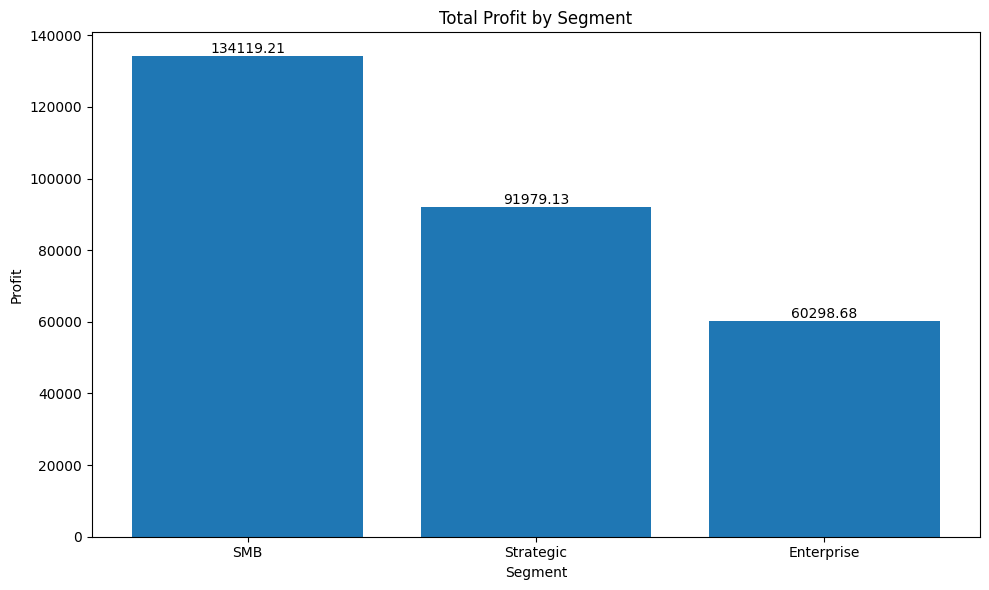

In [100]:
# Membuat bar chart untuk total profit berdasarkan segmen
plt.figure(figsize=(10, 6))
plt.bar(df_segment['Segment'], df_segment['Profit'])

for x, y in zip(df_segment['Segment'], df_segment['Profit']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Total Profit by Segment')
plt.tight_layout()
plt.show()

**Insight :**

- SMB Sales 1161401 USD. Pemberian diskon diatas 20% menyebabkan kerugian pada segment SMB sehingga total Profit yang didapat hanya 60298 USD.
- Strategic Sales 706146 USD. Pemberian diskon diatas 20% menyebabkan kerugian pada segment Strategic sehingga total Profit yang didapat hanya 91979 USD.
- Senterprise Sales 429653 USD. Pemberian diskon diatas 20% menyebabkan kerugian pada segment Enterprise sehingga total Profit yang didapat hanya 60298 USD.

### b. INDUSTRY

In [101]:
df_ind = df.groupby(['Industry'])[['Sales', 'Profit']].sum().sort_values(by = 'Profit',ascending= False).reset_index()
df_ind['Gross Profit Margin (%)'] = np.round((df_ind['Profit']/df_ind['Sales'])*100,3)
df_ind.head(3)

,Industry,Sales,Profit,Gross Profit Margin (%)
0,Finance,474150.4844,50348.9696,10.619
1,Energy,304644.1409,45282.3137,14.864
2,Manufacturing,295192.3812,38413.1064,13.013


In [102]:
df_ind.tail(3)

,Industry,Sales,Profit,Gross Profit Margin (%)
7,Communications,120962.2365,13976.3410,11.554
8,Transportation,90191.3276,7402.6967,8.208
9,Misc,28591.7596,7163.6290,25.055


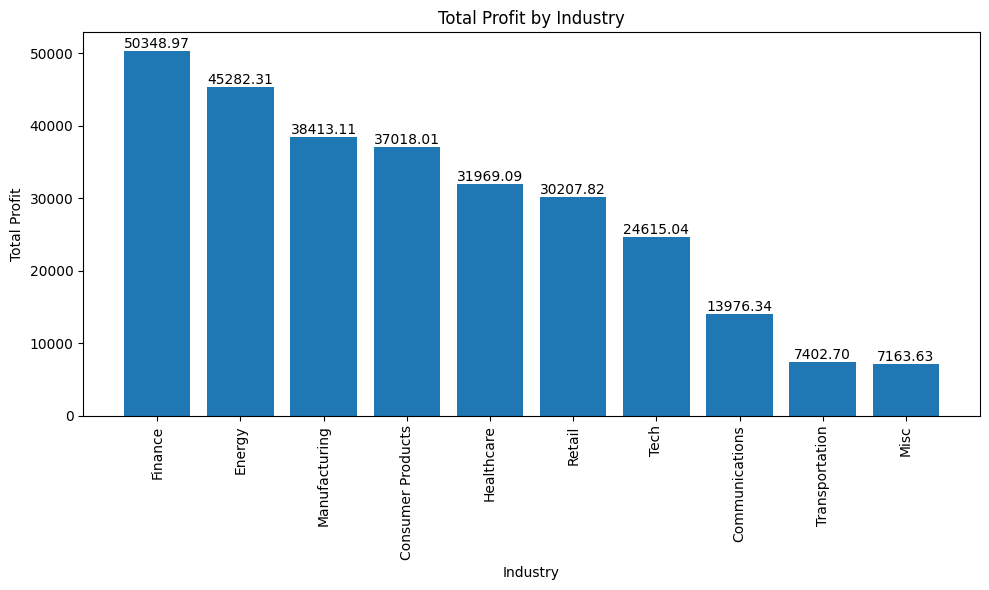

In [103]:
plt.figure(figsize=(10, 6))
plt.bar(df_ind['Industry'], df_ind['Profit'])

for x, y in zip(df_ind['Industry'], df_ind['Profit']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xlabel('Industry')
plt.ylabel('Total Profit')
plt.title('Total Profit by Industry')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insight :**

- Profit terbesar diperoleh dari Industri Finance, yaitu sebesar 50348.97 USD.
- Profit terendah dari Industri Misc dengan keuntungan sebesar 7163.63.

Perbedaan penjualan SaaS pada tiap industri dapat disebabkan oleh:

- Perbedaan kebutuhan dan tantangan industri, dimana pada industri finance, energy, dan manufacture mungkin memiliki kebutuhan yang lebih besar terkait dengan penggunaan SaaS untuk mengelola data, analisis, manajemen risiko, dan efisiensi operasional. Sedangkan industri komunikasi, transportasi, dan lainnya belum memiliki kebutuhan mendesak terkait penggunaan SaaS terutama bagi yang memiliki infrasturktur tersendiri atau belum menerapkan teknologi baru seperti SaaS.
- Industri finance memiliki regulasi yang ketat terkait dengan keamanan data, privasi, dan kepatuhan, yang mendorong penggunaan SaaS untuk memenuhi persyaratan ini. Industri lain, seperti transportasi, mungkin memiliki regulasi yang berbeda, sehingga berpengaruh pada tingkat penggunaan SaaS.
- Industri energi dan manufaktur lebih cenderung menggunakan teknologi baru untuk meningkatkan efisiensi operasional, mengurangi biaya produksi, dan mengelola supply chain mereka. Industri transportasi dan komunikasi mungkin menghadapi tantangan dalam mengadopsi teknologi baru karena kompleksitas infrastruktur yang ada atau ketergantungan pada sistem lama.

### c. REGION

In [104]:
df_region = df.groupby(['Region'])[['Sales', 'Profit']].sum().sort_values('Profit', ascending= False).reset_index()
df_region['Gross Profit Margin (%)'] = np.round(df_region['Profit']/df_region['Sales']*100,3)
df_region

,Region,Sales,Profit,Gross Profit Margin (%)
0,EMEA,1.043887e+06,147456.0450,14.126
1,AMER,8.378496e+05,127426.9898,15.209
2,APJ,4.154642e+05,11513.9869,2.771


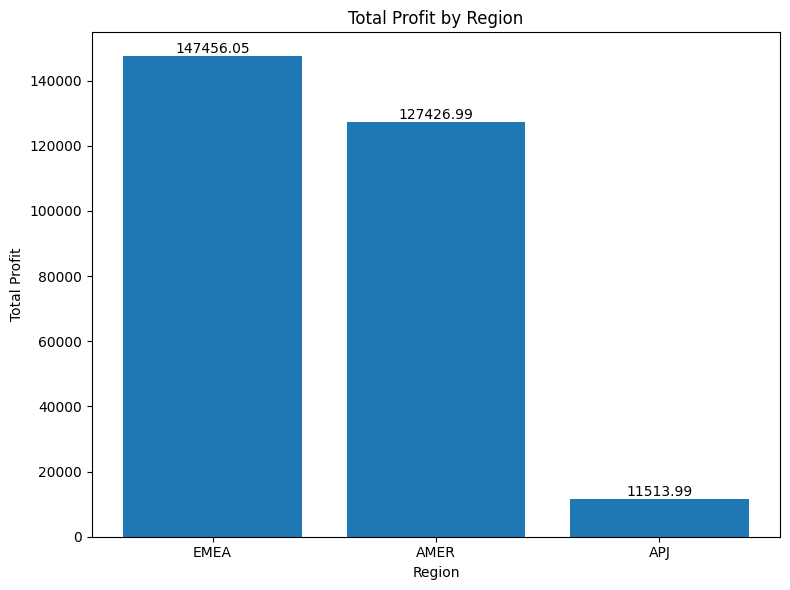

In [105]:
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_region['Region'], df_region['Profit'])

for x, y in zip(df_region['Region'], df_region['Profit']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.tight_layout()
plt.show()

In [106]:
df_region2 = df.groupby(['Region','Product'])[['Quantity', 'Sales', 'Profit']].sum().sort_values(by = 'Profit', ascending= False).reset_index()
df_region2['Gross Profit Margin (%)'] = np.round(df_region2['Profit']/df_region2['Sales']*100,3)
df_region_emea = df_region2[df_region2['Region'] == 'EMEA'].sort_values('Gross Profit Margin (%)', ascending= False).reset_index(drop=True)
df_region_emea

,Region,Product,Quantity,Sales,Profit,Gross Profit Margin (%)
0,EMEA,SaaS Connector Pack - Gold,416,6290.760,2669.6938,42.438
1,EMEA,Storage,332,1099.782,371.7126,33.799
2,EMEA,Alchemy,101,57969.136,19533.6956,33.697
3,EMEA,Data Smasher,1265,72162.890,18539.8124,25.692
4,EMEA,OneView,728,52354.810,12795.5468,24.440
5,EMEA,ChatBot Plugin,1296,11145.306,2706.4679,24.283
6,EMEA,Support,2462,57189.716,13040.9991,22.803
7,EMEA,SaaS Connector Pack,1500,41540.002,8142.7235,19.602
8,EMEA,Site Analytics,1405,149057.008,24612.0425,16.512
9,EMEA,FinanceHub,1639,155230.987,21229.0296,13.676


In [107]:
df_region_amer = df_region2[df_region2['Region'] == 'AMER'].sort_values('Gross Profit Margin (%)', ascending = False).reset_index(drop=True)
df_region_amer

,Region,Product,Quantity,Sales,Profit,Gross Profit Margin (%)
0,AMER,SaaS Connector Pack - Gold,274,5309.1500,2408.6077,45.367
1,AMER,Alchemy,91,49799.2540,18264.2564,36.676
2,AMER,Storage,385,1313.5280,407.2475,31.004
3,AMER,Support,2070,45932.3140,13952.3323,30.376
4,AMER,Data Smasher,1120,70328.1420,19152.0253,27.232
5,AMER,OneView,634,40756.3170,10613.2993,26.041
6,AMER,ChatBot Plugin,1082,10591.3160,2698.8127,25.481
7,AMER,SaaS Connector Pack,1341,34811.5520,8690.4832,24.964
8,AMER,ContactMatcher,2661,166236.4240,26663.9591,16.040
9,AMER,Marketing Suite - Gold,1194,82718.5840,10364.8535,12.530


In [108]:
df_region_apj = df_region2[df_region2['Region'] == 'APJ'].sort_values('Gross Profit Margin (%)', ascending = False).reset_index(drop=True)
df_region_apj

,Region,Product,Quantity,Sales,Profit,Gross Profit Margin (%)
0,APJ,Alchemy,42,41759.6400,17819.8729,42.672
1,APJ,SaaS Connector Pack - Gold,216,4876.4920,1885.8752,38.673
2,APJ,Storage,197,610.9700,170.5581,27.916
3,APJ,Support,1293,22030.7140,5871.1384,26.650
4,APJ,ChatBot Plugin,622,5382.1700,1122.5064,20.856
5,APJ,Data Smasher,591,24889.2860,4244.7980,17.055
6,APJ,Site Analytics,678,67052.6580,10631.0486,15.855
7,APJ,Marketing Suite - Gold,673,44430.0520,2718.0106,6.118
8,APJ,FinanceHub,767,64747.9320,1652.3162,2.552
9,APJ,Marketing Suite,186,23925.3868,-1895.6634,-7.923


**Insight :**

- Profit terbanyak di region Europe, Middle Eastern, Africa (EMEA) sebesar 147456 USD
- Profit terendah di region Asia Pacific Japan (APJ) sebesar 11514 USD
> EMEA :
- Gross Profit Margin terbesar dari penjualan SaaS Connector Pack - Gold (42%) dan paling kecil dari penjualan Marketing Suite (-3%).
> AMER :
- Gross Profit Margin terbesar dari penjualan SaaS Connector Pack - Gold (45%) dan paling kecil dari penjualan Big Ol Database (-7%).
> APJ :
- Gross Profit Margin terbesar dari penjualan Alchemy (42%) dan paling kecil dari penjualan Oneview (-36%).

## **5. RFM**

Model Recency, Frequency, dan Monetary (RFM) dilakukan untuk menilai customer yang didasari oleh kebiasaan transaksi.

In [109]:
# Mengelompokkan Customer berdasarkan transaksi terakhir, frekuensi transaksi, dan total nilai transaksi
df_RFM = df.groupby('Customer').agg(last_transaction = ('Order Date', 'max'), Frequency = ('Order ID', 'nunique'), Monetary= ('Sales', 'sum')).reset_index()

# Membuat variabel tanggal untuk mengukur recency, dengan asumsi tanggal membuat analisa data adalah 31 Januari 2024
date = dt.datetime(2024, 1, 31)

df_RFM['Recency'] = (date - df_RFM['last_transaction']).dt.days
df_RFM.head()

,Customer,last_transaction,Frequency,Monetary,Recency
0,AT&T,2023-12-22,67,29462.324,40
1,Abbott Laboratories,2023-12-19,31,12617.114,43
2,Aetna,2023-12-10,76,27278.593,52
3,Airbus,2023-12-04,58,29798.593,58
4,Allianz,2023-12-30,102,42904.167,32


In [110]:
# Membuat skor untuk Recency, Frequency, dan Monetary
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]

df_RFM['RecencyScore'] = pd.cut(df_RFM['Recency'], bins = 5, labels= recency_scores)
df_RFM['FrequencyScore'] = pd.cut(df_RFM['Frequency'], bins = 5, labels= frequency_scores)
df_RFM['MonetaryScore'] = pd.cut(df_RFM['Monetary'], bins= 5, labels= monetary_scores)

# Convert RFM scores ke numerik
df_RFM['RecencyScore'] = df_RFM['RecencyScore'].astype(int)
df_RFM['FrequencyScore'] = df_RFM['FrequencyScore'].astype(int)
df_RFM['MonetaryScore'] = df_RFM['MonetaryScore'].astype(int)

Membagi skala pengukuran menjadi lima bagian yang sama dan memberikan skor tergantung pada kriteria yang ditentukan. Kolom `RecencyScore`, `FrequencyScore`, dan `MonetaryScore` memberikan gambaran kuantitatif RFM tiap customer, sehingga dapat digunakan untuk segmentasi dan analisis lebih lanjut. Pembagian skala Frequency Score dan Monetary Score dimulai dari 1-5, sedangkan Recency Score dari 5-1. Pembagian ini dilakukan karena Recency akan semakin baik jika angka yang dihasilkan kecil, menandakan bahwa semakin kecil Recency berarti transaksi yang dilakukan customer belum lama.

In [111]:
# Membuat segmentasi RFM berdasar skor RFM
df_RFM['RFM_Score'] = df_RFM['RecencyScore'].map(str) + df_RFM['FrequencyScore'].map(str) + df_RFM['MonetaryScore'].map(str)

df_RFM.head()

,Customer,last_transaction,Frequency,Monetary,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,AT&T,2023-12-22,67,29462.324,40,5,3,3,533
1,Abbott Laboratories,2023-12-19,31,12617.114,43,5,1,1,511
2,Aetna,2023-12-10,76,27278.593,52,5,4,3,543
3,Airbus,2023-12-04,58,29798.593,58,5,3,3,533
4,Allianz,2023-12-30,102,42904.167,32,5,5,4,554


RFM Score diperoleh dari gabungan tiga kategori yang berbeda, yaitu Recency, Frequency, dan Monetary. RFM Score digunakan untuk menunjukkan kriteria setiap customer.

Kriteria penilaian tiap kategori RFM,:
- skor Recency tinggi untuk customer dengan transaksi yang lebih baru.
- skor Frequency tinggi untuk customer dengan frekuensi pembelian lebih tinggi.
- skor Monetary tinggi untuk customer yang melakukan pembelian lebih banyak.

Customer diberi skor antara 1 - 5 untuk masing-masing dari ketiga kategori ini, dengan 5 sebagai yang tertinggi. Customer yang mendapatkan skor 5, 5, 5 mewakili customer ideal dimana customer paling setia melakukan transaksi dengan frekuensi belanja dan nilai transaksi yang tinggi, sehingga skor RFM mereka akan mencapai angka sempurna.  Berbeda dengan customer yang jarang melakukan transaksi maupun melakukan transaksi dengan nilai yang rendah akan mendapatkan skor rendah.
[Sumber](https://documentation.bloomreach.com/engagement/docs/rfm-segmentation)

### **SEGMENTASI RFM**

Segmentasi RFM = mengkategorikan customer ke dalam segmen yang berbeda sesuai dengan kebiasaan mereka dalam melakukan transaksi, kemudian melakukan pendekatan yang paling efektif untuk meningkatkan dan mempertahankan loyalitas customer.

Segmentasi RFM dilakukan untuk mengenal customer lebih baik. Perusahaan dapat mengenali berbagai jenis pelanggan, memahami kebutuhan pelanggan, dan membentuk pengalaman serta menyesuaikan penawaran untuk para customer dengan menggunakan RFM. Cara ini dilakukan untuk mendapatkan dan mempertahankan customer, dimulai dengan mencari tahu skor RFM dari tiap customer. Tinggi rendahnya skor RFM akan berpengaruh terhadap strategi yang akan diterapkan pada tiap customer tergantung pada Tingkatannya. 

Segmentasi RFM dimulai berdasarkan dari skor tertinggi sampai terendah :

| Segmen | Aktivitas |
|---|---|
| Champions | Membeli baru-baru ini, sering order dan membelanjakan paling banyak |
| Loyal | Melakukan order secara teratur |
| Potential Loyalist | Pelanggan baru-baru ini yang menghabiskan banyak uang |
| New Customers | Pembeli paling baru |
| Promising | Calon Potential Loyalist, namun transaksi terakhir sudah lama |
| Need Attention | Customer tetap yang transaksi terakhirnya terjadi sudah lama |
| About to sleep | Transaksi terakhir sudah lama sekali tetapi dalam 4 minggu terakhir mereka mengunjungi situs atau membuka email |
| Cannot Lose Them But Losing | Transaksi terbesar dan sering. Tapi sudah lama tidak kembali |
| At Risk | Sama dengan 'Cannot Lose Them' namun Frequency dan Monetary lebih kecil |
| Hibernating customers | Customer yang sebelumnya melakukan pembelian dalam jumlah kecil dan jarang, namun sudah lama tidak membeli apa pun |
| Lost Customers | Transaksi terakhir sudah lama sekali dan tidak terlibat sama sekali dalam 4 minggu terakhir |

Customer dengan segmen bawah, terutama 'Hibernating Customers' dan 'Lost Customers', mengharuskan perusahaan untuk mencari dan memperbaiki strategi untuk menarik kembali para customer. [Sumber](https://documentation.bloomreach.com/engagement/docs/rfm-segmentation)

In [112]:
# Membuat mapping untuk segmentasi RFM
mapping = {
    '111':'Lost Customers', '112':'Lost Customers', '113':'Cannot Lose Them But Losing', '114':'Cannot Lose Them But Losing', '115':'Cannot Lose Them But Losing',
    '121':'Lost Customers', '122':'Hibernating Customers', '123':'Hibernating Customers', '124':'At Risk', '125':'At Risk',
    '131':'Lost Customers', '132':'Hibernating Customers', '133':'At Risk', '134':'At Risk', '135':'At Risk',
    '141':'Lost Customers', '142':'At Risk', '143':'At Risk', '144':'Cannot Lose Them But Losing', '145':'At Risk',
    '151':'Lost Customers', '152':'At Risk', '153':'At Risk', '154':'Cannot Lose Them But Losing', '155':'Cannot Lose Them But Losing',
    '211':'Hibernating Customers', '212':'Hibernating Customers','213':'About To Sleep', '214':'Cannot Lose Them But Losing', '215':'Cannot Lose Them But Losing',
    '221':'About To Sleep', '222':'Hibernating Customers', '223':'Hibernating Customers', '224':'At Risk', '225':'At Risk',
    '231':'About To Sleep', '232':'Hibernating Customers', '233':'Hibernating Customers', '234':'At Risk', '235':'At Risk',
    '241':'About To Sleep', '242':'At Risk', '243':'At Risk', '244':'At Risk', '245':'At Risk',
    '251':'About To Sleep', '252':'At Risk', '253':'At Risk', '254':'At Risk', '255':'At Risk',
    '311':'New Customers', '312':'About To Sleep', '313':'Promising', '314':'Promising', '315':'Promising',
    '321':'About To Sleep', '322':'Hibernating Customers', '323':'Potential Loyalists', '324':'Need Attention', '325':'Need Attention',
    '331':'About To Sleep', '332':'Hibernating Customers', '333':'Potential Loyalists', '334':'Need Attention', '335':'Loyal',
    '341':'Potential Loyalists', '342':'Potential Loyalists', '343':'Need Attention', '344':'Loyal', '345':'Loyal',
    '351':'Potential Loyalists', '352':'Potential Loyalists', '353':'Potential Loyalists', '354':'Loyal', '355':'Loyal',
    '411':'New Customers', '412':'New Customers', '413':'Promising', '414':'Promising', '415':'Promising',
    '421':'New Customers', '422':'New Customers', '423':'Potential Loyalists', '424':'Promising', '425':'Promising',
    '431':'Potential Loyalists', '432':'Potential Loyalists', '433':'Potential Loyalists', '434':'Need Attention', '435':'Loyal',
    '441':'Potential Loyalists', '442':'Potential Loyalists', '443':'Need Attention', '444':'Loyal', '445':'Champions',
    '451':'Potential Loyalists', '452':'Potential Loyalists', '453':'Potential Loyalists', '454':'Champions', '455':'Champions',
    '511':'New Customers', '512':'New Customers', '513':'Promising', '514':'Promising', '515':'Promising',
    '521':'Promising', '522':'Promising', '523':'Promising', '524':'Promising', '525':'Promising',
    '531':'Potential Loyalists', '532':'Potential Loyalists', '533':'Potential Loyalists','534':'Need Attention', '535':'Need Attention',
    '541':'Potential Loyalists', '542':'Potential Loyalists', '543':'Loyal', '544':'Champions', '545':'Champions',
    '551':'Potential Loyalists', '552':'Potential Loyalists', '553':'Potential Loyalists', '554':'Champions', '555':'Champions'
}

# Mapping nilai
df_RFM['Value Segment'] = df_RFM['RFM_Score'].map(mapping)

df_RFM

,Customer,last_transaction,Frequency,Monetary,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,AT&T,2023-12-22,67,29462.3240,40,5,3,3,533,Potential Loyalists
1,Abbott Laboratories,2023-12-19,31,12617.1140,43,5,1,1,511,New Customers
2,Aetna,2023-12-10,76,27278.5930,52,5,4,3,543,Loyal
3,Airbus,2023-12-04,58,29798.5930,58,5,3,3,533,Potential Loyalists
4,Allianz,2023-12-30,102,42904.1670,32,5,5,4,554,Champions
...,...,...,...,...,...,...,...,...,...,...
94,Volkswagen,2023-12-10,65,35200.4240,52,5,3,3,533,Potential Loyalists
95,Walgreens,2023-12-17,33,14420.6190,45,5,2,1,521,Promising
96,Walmart,2023-12-11,46,21508.1790,51,5,2,2,522,Promising
97,Walt Disney,2023-12-09,53,29483.0050,53,5,3,3,533,Potential Loyalists


Value segment dihitung berdasarkan total RFM Score Kode tiap customer dan dibagi ke kategori tertentu berdasar value yang didapat.

RFM score diperoleh dengan menjumlah 'RecencyScore', 'FrequencyScore', dan 'MonetaryScore'.

Selanjutnya pada bagian value segment dibagi secara merata menjadi tiga kuantil dan diberi label 'Low', 'Medium', dan 'High'. Segmentasi customer bergantung pada besarnya RFM score, sehingga customer dengan RFM score tinggi akan masuk pada kategori 'High', dan sebaliknya, customer dengan RFM rendah akan masuk pada segmen 'Low'. Segmentasi ini memungkinkan bisnis untuk mengidentifikasi dan menargetkan customer dengan mengembangkan strategi pemasaran khusus yang berbeda untuk setiap segmennya.


In [113]:
segment_product_counts = df_RFM.groupby(['Value Segment']).size().reset_index(name = 'Count')
segment_product_counts = segment_product_counts.sort_values('Count', ascending= False)
segment_product_counts = segment_product_counts[segment_product_counts['Count'] >= 1]
segment_product_counts

,Value Segment,Count
6,Potential Loyalists,33
7,Promising,29
5,New Customers,15
3,Loyal,7
0,Champions,6
4,Need Attention,6
1,Hibernating Customers,2
2,Lost Customers,1


In [114]:
import plotly.express as px
treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value Segment'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
treemap_segment_product.show()

**Insight :**

- Berdasarkan hasil dari segmentasi RFM tiap perusahaan, Perusahaan terbagi dalam beberapa kategori, antara lain : Potential Loyalists sebanyak 33 perusahaan, Promising sebanyak 29 perusahaan, New Customers sebanyak 15 perusahaan, Loyal sebanyak 7 perusahaan, Champions sebanyak 6 perusahaan, Need Attention sebanyak 6 perusahaan, Hibernating Customers sebanyak 2 perusahaan, dan Lost Customers 1 perusahaan.

- Lost Customers : Citigroup, dengan transaksi sebanyak 13 kali dengan total 6132.521 USD, transaksi terakhir 270 Hari lalu.

- Champions : Allianz, AmerisourceBergen, BNP Paribas, Ford Motor, Siemens, Tyson Foods.

# **VI. CONCLUSION**

1. Terjadi kenaikan penjualan tahun namun tidak diiringi dengan peningkatan gross profit margin. Hal ini menunjukkan bahwa perusahaan mampu meningkatkan Sales dan Profit tiap tahunnya namun belum mampu melakukan efisiensi biaya.
2. Pemberian diskon yang berlebihan menyebabkan kerugian dari segi perusahaan. Jika terus berlanjut tanpa adanya regulasi terkait diskon, maka akan beresiko terhadap kelangsungan perusahaan, dimana pendapatan bersih akan menurun dan mempengaruhi keuntungan bersih. Selain itu dengan diskon yang tidak terkendali akan menurunkan citra merek karena customer akan menganggap produk memiliki nilai intrinsik yang lebih rendah dari nilai jualnya.
3. Segmen dengan kontribusi terbesar dari segmen SMB. Hal ini terjadi karena volume pelanggan dalam segmen ini biasanya jauh lebih tinggi daripada di Enterprise atau segmen Strategic. Selain itu dan kemudahan akses SaaS menjadikan solusi yang mudah digunakan dan diimplementasikan tanpa perlu sumber daya IT yang besar, beda dengan Enterprise atau Strategic yang lebih kompleks. Dengan kemudahan tersebut menjadikan biaya SaaS pada segmen SMB lebih rendah.
4. Industri dengan kontribusi terbesar berasal dari Finance, Energy, dan Manufacturing. Kebutuhan yang lebih besar terkait dengan penggunaan SaaS untuk mengelola data, analisis, manajemen risiko, dan efisiensi operasional menjadi faktor kuat yang menjadikan pentingnya penggunaan SaaS bagi industri. Industri finance memiliki regulasi yang ketat terkait dengan keamanan data, privasi, dan kepatuhan, sehingga mendorong penggunaan SaaS
5. Region dengan kotribusi terbesar berasal dari EMEA (Europe, Middle Eastern, Africa). Pertumbuhan ekonomi, regulasi, kesiapan teknologi,dan jumlah perusahaan besar yang beroperasi di region tersebut berpengaruh terhadap penggunaan SaaS untuk mendukung bisnis.
6. Banyaknya customer dalam kategori Potential Loyalists, Promising, New Customers menunjukkan adanya peluang yang besar untuk pertumbuhan dan retensi pelanggan. Hal ini merupakan situasi yang positif bagi perusahaan, tetapi juga memerlukan tindakan yang tepat untuk memanfaatkan potensi ini. Perusahaan dapat membuat penawaran sesuai dengan segmen customer. Perusahaan juga harus meningkatkan layanan dan melibatkan customer. Membantu New Customer untuk memahami nilai produk akan mengurangi resiko churn di awal. Mengembangkan produk sesuai dengan feedback customer dan tren pasar sangat diperlukan, memiliki produk yang inovatif dan relevan akan membantu mempertahankan customer yang sudah ada dan menarik customer baru.



# **VII. RECOMMENDATION**

1. Perlu dilakukan evaluasi untuk penjualan yang tinggi namun profit menurun atau tetap rendah, yaitu dengan peninjauan mendalam terkait biaya, strategi penetapan harga, evaluasi produk atau layanan, analisis pesaing, dan juga upaya untuk meningkatkan efisiensi operasional dan memperbaiki Profit Margin. Perlunya evaluasi pada produk Marketing Suite yang Profitnya lebih kecil daripada Marketing Suite - Gold, bisa dengan menggabung 2 layanan tersebut menjadi satu atau migrasi pengguna Marketing Suite ke Marketing Suite - Gold kemudian menghapus produk yang tidak profit.

2. Mengatur ulang strategi penetapan Discount bagi Customer sehingga menguntungkan bagi kedua belah pihak, dimana Perusahaan tidak mengalami kerugian namun tidak memberatkan Customer dengan penyesuaian Discount yang didapatkan. Pemberian diskon yang harus diperhatikan karena diskon lebih dari 30%, antara lain: ContactMatcher, Marketing Suite, Big Ol Database, Site Analytics, SaaS Connector Pack, Oneview.

3. Memberikan edukasi bagi industri terkait penggunaan SaaS yang mempermudah bisnis perusahaan.

4. Membuat strategi untuk memperbaiki produk atau layanan di region dengan profit yang rendah, perhatikan kondisi perekonomian negara tersebut dan sesuaikan harga produk dengan kemampuan daya beli customer di negara tersebut. Lakukan promosi untuk memperkenalkan produk ke customer baru terutama pada segmen Small Medium Business (SMB) dimana konsumen segmen SMB lebih banyak dibanding Enterprise maupun Strategic.

5. Terkait perilaku Customer, hal-hal yang dapat dilakukan perusahan:

- >**Champions :**
- Memberikan akses eksklusif ke fitur premium, customer support 24/7, dan penawaran harga khusus.
- Memberikan insentif untuk mereferensikan produk ke perusahaan lain.
- Melibatkan customer dalam beta test untuk produk baru atau fitur tambahan, dan gunakan feedback untuk meningkatkan produk secara keseluruhan.

- >**Loyal :**
- Menawarkan diskon berkelanjutan bagi customer Loyal atau harga khusus sebagai bentuk penghargaan atas loyalitas customer.
- Memperkuat hubungan dengan pelanggan Loyal melalui webinar khusus atau konsultasi yang dibuat khusus untuk mereka.
- Melibatkan customer dalam beta test untuk produk baru atau fitur tambahan, dan gunakan feedback untuk meningkatkan produk secara keseluruhan.

- >**Potential Loyalists :**
- Mengembangkan campaign pemasaran yang ditargetkan khusus dengan berfokus pada manfaat dan value produk yang ditawarkan.
- Memberikan demo produk atau uji coba gratis kepada customer mencoba sebelum memutuskan untuk berlangganan.

- >**New Customers :**
- Menawarkan diskon atau welcome offer kepada customer baru agar memulai penggunaan produk dengan cepat.
- Memberikan penawaran khusus untuk pembelian berikutnya atau langganan jangka panjang.

- >**Promising :**
- Meningkatkan engagement produk untuk menarik customer melalui pelatihan, tutorial, atau webinar tentang key features.
- Memberikan penawaran upgrade atau diskon khusus bagi customer untuk meningkatkan transaksi.

- >**Need Attention :**
- Melakukan audit untuk mengidentifikasi masalah atau kebutuhan customer dan melakukan perbaikan.
- Menjaga komunikasi secara aktif dengan customer, menawarkan solusi yang relevan dan mengikuti untuk memastikan kebutuhan mereka terpenuhi.

- >**Hibernating Customers :**
- Memberikan insentif atau penawaran khusus untuk mendorong customer supaya kembali berlangganan.
- Meninjau riwayat transaksi dan mengembangkan strategi untuk memperbaiki pengalaman customer dengan produk.

- >**Lost Customers :**
- Melakukan kontak langsung dengan customer untuk memahami masalah dan menawarkan solusi yang memuaskan.
- Melakukan analisis menyeluruh untuk memahami alasan di balik perginya customer dan membuat rencana tindak lanjut untuk mencegah kehilangan customer di masa depan.

In [115]:
## Ekspor dataset pendukung RFM
# df_RFM.to_csv('RFM.csv')